In [546]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # For visualising the plots.
import seaborn as sns

from sklearn import preprocessing # For Preprocessing the data(e.g. StandardScaler,Labelencoder)
from sklearn.linear_model import LogisticRegression # Model buidling 
from sklearn.model_selection import train_test_split # TO split the data in 2 train and test sets.
import statsmodels.api as sma # To Build a Statistical model for more interprretability.
import warnings
warnings.filterwarnings(action = "ignore")
plt.rcParams['figure.figsize']=[15,7]

In [547]:
pd.set_option('display.max_columns', None) #TO display ALl the columns

In [548]:
df=pd.read_csv("public_150k_plus_230101.csv")
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [549]:
df.shape  #There are 53 columns and 968531 observations in the dataset.

(968531, 53)

In [550]:
## Understanding the structure of the data variables
df.info() # For getting all the information of the variables present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

In [551]:
##Checking for missing values. There are some missing values.
print(df.isnull().sum())

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  47
FranchiseName                  933126
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [552]:
df.isnull().sum()/len(df)*100 # Checking the percentage of nullvalues in each column.

LoanNumber                      0.000000
DateApproved                    0.000000
SBAOfficeCode                   0.000000
ProcessingMethod                0.000000
BorrowerName                    0.000413
BorrowerAddress                 0.001445
BorrowerCity                    0.001239
BorrowerState                   0.001342
BorrowerZip                     0.001342
LoanStatusDate                  3.889086
LoanStatus                      0.000000
Term                            0.000000
SBAGuarantyPercentage           0.000000
InitialApprovalAmount           0.000000
CurrentApprovalAmount           0.000000
UndisbursedAmount               0.004853
FranchiseName                  96.344464
ServicingLenderLocationID       0.000000
ServicingLenderName             0.000000
ServicingLenderAddress          0.000000
ServicingLenderCity             0.000000
ServicingLenderState            0.000000
ServicingLenderZip              0.000000
RuralUrbanIndicator             0.000000
HubzoneIndicator

In [553]:
df.describe() # Statistical Description of all the continuous variables in the dataset.

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,9.685310e+05,968531.000000,968531.000000,968531.0,9.685310e+05,9.685310e+05,9.684840e+05,968531.000000,968530.000000,961903.000000,3.393770e+05,9.666990e+05,4.618300e+04,9.953300e+04,2.285500e+04,5.744600e+04,3.171700e+04,968531.000000,9.388850e+05
mean,5.427137e+09,571.519065,36.377761,100.0,5.322537e+05,5.306221e+05,1.515947e+01,108106.652551,51.886148,511805.521357,1.492980e+04,5.148787e+05,4.815543e+04,5.619529e+04,6.897797e+03,4.686043e+04,1.435866e+04,107644.444761,5.285127e+05
std,2.551313e+09,263.024816,17.291796,0.0,7.442514e+05,7.378871e+05,4.109778e+03,133018.400599,67.550965,181178.016548,8.493622e+04,7.140568e+05,1.590929e+05,1.113755e+05,6.214069e+04,1.029112e+05,5.549347e+04,134878.837316,7.315001e+05
min,1.000007e+09,101.000000,0.000000,100.0,0.000000e+00,1.500000e+05,0.000000e+00,20.000000,0.000000,111110.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.000000,1.000000e-02
25%,3.271108e+09,373.000000,24.000000,100.0,2.002000e+05,2.004000e+05,0.000000e+00,29805.000000,18.000000,336612.000000,1.000000e+00,1.956000e+05,0.000000e+00,1.352500e+04,0.000000e+00,8.000000e+03,0.000000e+00,29805.000000,2.008463e+05
50%,5.400677e+09,515.000000,24.000000,100.0,2.951770e+05,2.950000e+05,0.000000e+00,56102.000000,30.000000,541211.000000,1.000000e+00,2.870793e+05,1.000000e+04,2.887300e+04,0.000000e+00,1.944000e+04,5.000000e+02,56102.000000,2.951752e+05
75%,7.546303e+09,811.000000,60.000000,100.0,5.402000e+05,5.393843e+05,0.000000e+00,117436.000000,54.000000,623110.000000,4.500000e+03,5.246035e+05,4.025550e+04,5.625000e+04,0.000000e+00,4.400000e+04,9.908000e+03,112407.000000,5.399421e+05
max,9.999007e+09,1094.000000,180.000000,100.0,1.000000e+07,1.000000e+07,2.400000e+06,538160.000000,500.000000,999990.000000,1.000000e+07,1.000000e+07,1.000000e+07,5.518278e+06,2.951590e+06,3.880000e+06,2.497617e+06,533479.000000,1.026528e+07


In [554]:
df.describe(include=object) # Statistical Description of all the categorical columns.

,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,FranchiseName,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,Race,Ethnicity,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessDate
count,968531,968531,968527,968517,968519,968518,968518,930864,968531,35405,968531,968531,968531,968531,968531,968531,968531,968531,968530,968518,968474,968522,968517,968485,968531,968531,967809,968531,968531,968531,968531,968531,59341,938885
unique,242,2,857441,884066,28698,56,520101,774,3,1575,4185,4471,2797,55,4656,2,2,2,5,28730,1911,56,525089,448,9,3,25,4202,2803,55,3,3,1,532
top,05/01/2020,PPP,FIRST UNITED METHODIST CHURCH,PO BOX,New York,CA,10018,01/21/2021,Paid in Full,McDonalds,"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240-2031,U,N,N,Existing or more than 2 years old,New York,LOS ANGELES,CA,10018-0001,NY-12,Unanswered,Unknown/NotStated,Corporation,"JPMorgan Chase Bank, National Association",COLUMBUS,OH,Unanswered,Unanswered,Y,11/03/2020
freq,70563,676863,40,88,12191,130614,840,13792,930850,1796,53539,53539,73799,116331,53539,823899,708688,713918,861916,12209,36179,130615,825,12738,773611,694239,418344,53539,73799,116347,581726,659937,59341,25614


In [555]:
s=df.isnull().sum()/len(df)*100
s[s>0].sort_values(ascending=False) # Filtering the Columns on the basis on null values in ascending order.

REFINANCE_EIDL_PROCEED       97.640241
DEBT_INTEREST_PROCEED        96.725247
FranchiseName                96.344464
MORTGAGE_INTEREST_PROCEED    95.231645
HEALTH_CARE_PROCEED          94.068749
NonProfit                    93.873092
RENT_PROCEED                 89.723303
UTILITIES_PROCEED            64.959614
LoanStatusDate                3.889086
ForgivenessDate               3.060924
ForgivenessAmount             3.060924
NAICSCode                     0.684335
PAYROLL_PROCEED               0.189152
BusinessType                  0.074546
ProjectCountyName             0.005885
UndisbursedAmount             0.004853
CD                            0.004749
BorrowerAddress               0.001445
ProjectZip                    0.001445
ProjectCity                   0.001342
BorrowerZip                   0.001342
BorrowerState                 0.001342
BorrowerCity                  0.001239
ProjectState                  0.000929
BorrowerName                  0.000413
JobsReported             

In [556]:
#These coumns contain above 90 percent null value and removes redundant features
df=df.drop(['FranchiseName','MORTGAGE_INTEREST_PROCEED','RENT_PROCEED','REFINANCE_EIDL_PROCEED',
                        'HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED','NonProfit','BorrowerName','BorrowerAddress','BorrowerCity','BorrowerZip',
                       'ServicingLenderLocationID','ServicingLenderName','ServicingLenderAddress','ServicingLenderCity','ServicingLenderZip','ProjectCity',
                      'ProjectCountyName','ProjectZip','UTILITIES_PROCEED','OriginatingLenderLocationID','OriginatingLenderCity','SBAGuarantyPercentage' ],axis=1)

In [557]:
df['ForgivenessDate'] = pd.to_datetime(df['ForgivenessDate'], format='%m/%d/%Y') # pd.to_datetime to change the Datatype to datatime.
df['LoanStatusDate']=pd.to_datetime(df['LoanStatusDate'],format='%m/%d/%Y')
df['DateApproved']=pd.to_datetime(df['DateApproved'],format='%m/%d/%Y')
df['NAICSCode']=df['NAICSCode'].astype(object) #.astype() function to change the datatype of the column
df['SBAOfficeCode']=df['SBAOfficeCode'].astype(object)

In [558]:
s=df.isnull().sum()/len(df)*100
s[s>0].sort_values(ascending=False) # Filtering the Columns on the basis on null values in ascending order.

LoanStatusDate            3.889086
ForgivenessAmount         3.060924
ForgivenessDate           3.060924
NAICSCode                 0.684335
PAYROLL_PROCEED           0.189152
BusinessType              0.074546
UndisbursedAmount         0.004853
CD                        0.004749
BorrowerState             0.001342
ProjectState              0.000929
BusinessAgeDescription    0.000103
JobsReported              0.000103
dtype: float64

In [559]:
df['ForgivenessAmount'].describe()

count    9.388850e+05
mean     5.285127e+05
std      7.315001e+05
min      1.000000e-02
25%      2.008463e+05
50%      2.951752e+05
75%      5.399421e+05
max      1.026528e+07
Name: ForgivenessAmount, dtype: float64

<AxesSubplot:xlabel='ForgivenessAmount'>

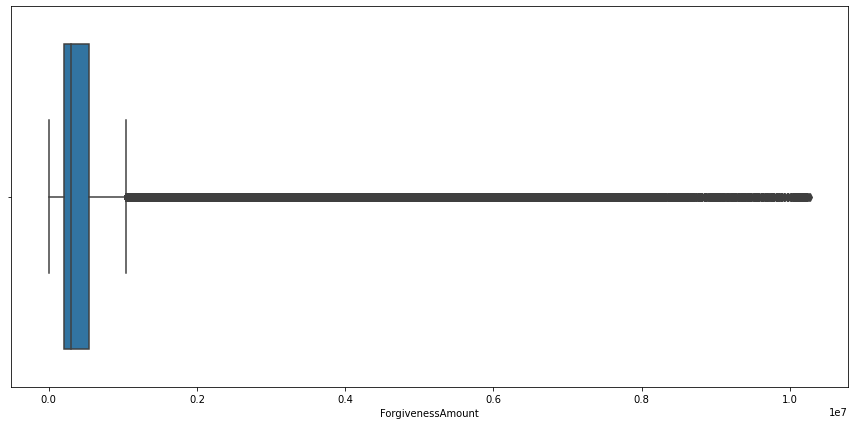

In [560]:
sns.boxplot(df['ForgivenessAmount']) # There are alot of extreme outliers in the Forgivenamount column.

In [561]:
# We will be replacing the null values using median as replacing them with mean is not optinum due to presence of outliers.

In [562]:
df['ForgivenessAmount']=df['ForgivenessAmount'].replace(np.nan,df['ForgivenessAmount'].median()) 

In [563]:
len(df[df['LoanStatusDate'].isnull()]) 

37667

In [564]:
len(df[df['LoanStatus']=='Exemption 4'])

37667

All null values in the LoanStatusDate column correspond to instances where the LoanStatus is 'Exemption 4', indicating that no loan status date is available for loans that are exempt from certain reporting requirements.

In [565]:
#droppinp null values
df=df.dropna(subset=['NAICSCode'])
df=df.dropna(subset=['ForgivenessDate'])
df=df.dropna(subset=['LoanStatusDate'])
df=df.dropna(subset=['BorrowerState'])
df=df.dropna(subset=['UndisbursedAmount'])
df=df.dropna(subset=['BusinessAgeDescription'])
df=df.dropna(subset=['ProjectState'])
df=df.dropna(subset=['CD'])
df=df.dropna(subset=['JobsReported'])
df=df.dropna(subset=['BusinessType'])

In [566]:
len(df[(df['CurrentApprovalAmount']-df['PAYROLL_PROCEED'])<10000]) # minimum difference between CurrentApprovalAmount and PAYROLL_PROCEED

790275

In [567]:
#replace PAYROLL_PROCEED null values with 'CurrentApprovalAmount when difference is less then 10000
df.loc[:,'PAYROLL_PROCEED']=np.where(df['PAYROLL_PROCEED']<10000,df['CurrentApprovalAmount'],df['PAYROLL_PROCEED'])

In [568]:
df['PAYROLL_PROCEED'].isnull().sum()

1783

In [569]:
#replace remaining null values with median
df['PAYROLL_PROCEED']=df['PAYROLL_PROCEED'].replace(np.nan,df['PAYROLL_PROCEED'].median())

In [570]:
df['PAYROLL_PROCEED'].isnull().sum()

0

In [571]:
df=df.drop('LoanNumber',axis=1) #contain unique values

In [572]:
df.isnull().sum()

DateApproved              0
SBAOfficeCode             0
ProcessingMethod          0
BorrowerState             0
LoanStatusDate            0
LoanStatus                0
Term                      0
InitialApprovalAmount     0
CurrentApprovalAmount     0
UndisbursedAmount         0
ServicingLenderState      0
RuralUrbanIndicator       0
HubzoneIndicator          0
LMIIndicator              0
BusinessAgeDescription    0
ProjectState              0
CD                        0
JobsReported              0
NAICSCode                 0
Race                      0
Ethnicity                 0
PAYROLL_PROCEED           0
BusinessType              0
OriginatingLender         0
OriginatingLenderState    0
Gender                    0
Veteran                   0
ForgivenessAmount         0
ForgivenessDate           0
dtype: int64

Inference - All null values removed

# Sampling the Data

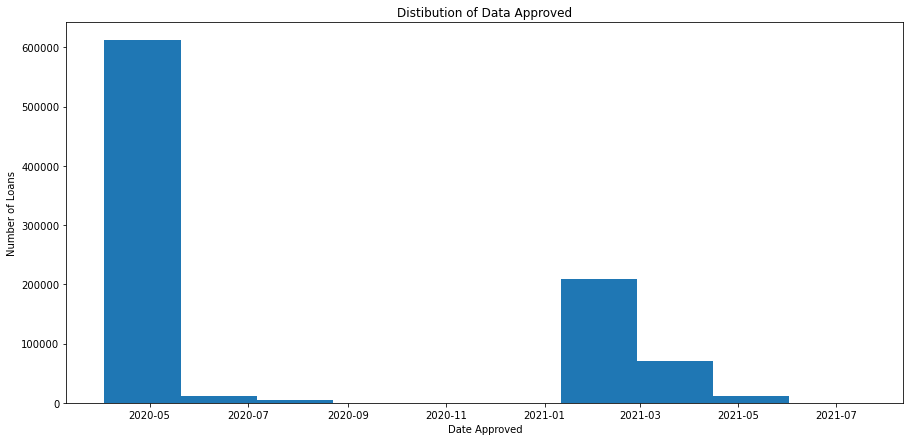

In [573]:
# Create a histogram of loan approvals by date
plt.hist(df["DateApproved"])
plt.xlabel("Date Approved")
plt.ylabel("Number of Loans")
plt.title('Distibution of Data Approved')
plt.show()

sample the data on the basis of date approval year
make two seperate data having loan amount date approved in 2020 and loan amount date approved in 2021

In [650]:
df_2020=df[df['DateApproved'].dt.year==2020]
df_2020

,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerState,LoanStatusDate,LoanStatus,Term,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderState,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectState,CD,JobsReported,NAICSCode,Race,Ethnicity,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderState,Gender,Veteran,ForgivenessAmount,ForgivenessDate
13,2020-08-08,1084,PPP,AK,2021-07-22,Paid in Full,60,9571397.0,9538531.0,0.0,AK,U,Y,Y,Existing or more than 2 years old,AK,AK-,385.0,541990.0,Unanswered,Unknown/NotStated,9538531.00,Limited Liability Company(LLC),Northrim Bank,AK,Unanswered,Unanswered,9615884.57,2021-06-11
14,2020-04-14,1084,PPP,AK,2021-08-21,Paid in Full,24,7666768.0,7666768.0,0.0,OH,R,N,N,Existing or more than 2 years old,AK,AK-,295.0,813920.0,Unanswered,Unknown/NotStated,7666768.00,Non-Profit Organization,"National Cooperative Bank, National Association",OH,Unanswered,Unanswered,7761324.81,2021-07-13
17,2020-04-14,1084,PPP,AK,2021-06-09,Paid in Full,24,6528631.4,6528631.4,0.0,AK,R,Y,N,Existing or more than 2 years old,AK,AK-,439.0,622110.0,Unanswered,Unknown/NotStated,5037890.65,Corporation,First National Bank Alaska,AK,Unanswered,Unanswered,6598389.38,2021-05-18
20,2020-04-11,1084,PPP,AK,2021-08-13,Paid in Full,24,3009400.0,6382400.0,0.0,CA,U,N,Y,Existing or more than 2 years old,AK,AK-,303.0,311710.0,Unanswered,Unknown/NotStated,6382400.00,Corporation,East West Bank,CA,Male Owned,Non-Veteran,6461470.84,2021-07-07
21,2020-06-10,1084,PPP,AK,2021-07-14,Paid in Full,60,5928882.0,5928882.0,0.0,CO,R,Y,N,Existing or more than 2 years old,AK,AK-,267.0,517311.0,Unanswered,Unknown/NotStated,5928882.00,Cooperative,CoBank ACB,CO,Unanswered,Unanswered,5987841.44,2021-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968520,2020-05-04,897,PPP,WY,2021-06-05,Paid in Full,24,150375.0,150375.0,0.0,MT,R,Y,Y,Existing or more than 2 years old,WY,WY-,6.0,237310.0,Unanswered,Unknown/NotStated,150375.00,Subchapter S Corporation,Glacier Bank,MT,Male Owned,Unanswered,151874.63,2021-05-21
968526,2020-04-03,897,PPP,WY,2021-01-13,Paid in Full,24,150000.0,150000.0,0.0,WY,U,N,N,Existing or more than 2 years old,WY,WY-,15.0,621210.0,Unanswered,Not Hispanic or Latino,150000.00,Corporation,Platte Valley Bank,WY,Male Owned,Non-Veteran,151037.50,2020-12-09
968527,2020-04-14,897,PPP,WY,2020-12-08,Paid in Full,24,150000.0,150000.0,0.0,NE,U,N,N,Existing or more than 2 years old,WY,WY-,42.0,624410.0,Unanswered,Unknown/NotStated,145000.00,Non-Profit Childcare Center,NebraskaLand Bank,NE,Unanswered,Unanswered,150789.04,2020-11-03
968529,2020-04-15,897,PPP,WY,2022-03-08,Paid in Full,60,150000.0,150000.0,0.0,KS,R,N,N,New Business or 2 years or less,WY,WY-,7.0,621610.0,Unanswered,Unknown/NotStated,150000.00,Corporation,Small Business Bank,KS,Unanswered,Unanswered,152820.83,2022-02-23


In [651]:
df_2020.describe(include=np.number)

,Term,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,JobsReported,PAYROLL_PROCEED,ForgivenessAmount
count,626928.000000,6.269280e+05,6.269280e+05,626928.0,626928.000000,6.269280e+05,6.269280e+05
mean,25.199364,5.712504e+05,5.687839e+05,0.0,55.760349,5.452280e+05,5.693701e+05
std,6.461687,8.267655e+05,8.189626e+05,0.0,73.378787,7.881664e+05,8.214129e+05
min,0.000000,0.000000e+00,1.500000e+05,0.0,0.000000,1.000000e+04,1.000000e-02
25%,24.000000,2.016000e+05,2.017924e+05,0.0,19.000000,1.946000e+05,2.021003e+05
50%,24.000000,3.022000e+05,3.019000e+05,0.0,31.000000,2.894097e+05,3.025400e+05
75%,24.000000,5.713000e+05,5.695865e+05,0.0,58.000000,5.455888e+05,5.704303e+05
max,82.000000,1.000000e+07,1.000000e+07,0.0,500.000000,1.000000e+07,1.024137e+07


In [652]:
df_2020.sample(frac=0.3,random_state=10,replace=True).describe(include=np.number)

,Term,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,JobsReported,PAYROLL_PROCEED,ForgivenessAmount
count,188078.000000,1.880780e+05,1.880780e+05,188078.0,188078.000000,1.880780e+05,1.880780e+05
mean,25.185684,5.736466e+05,5.712042e+05,0.0,55.872861,5.480080e+05,5.717089e+05
std,6.428810,8.280985e+05,8.201025e+05,0.0,73.537639,7.908687e+05,8.222300e+05
min,0.000000,0.000000e+00,1.500000e+05,0.0,0.000000,1.427352e+04,1.000000e-02
25%,24.000000,2.017725e+05,2.020000e+05,0.0,19.000000,1.949722e+05,2.021868e+05
50%,24.000000,3.030000e+05,3.028000e+05,0.0,31.000000,2.900000e+05,3.033167e+05
75%,24.000000,5.735000e+05,5.720672e+05,0.0,58.000000,5.481000e+05,5.728671e+05
max,82.000000,1.000000e+07,1.000000e+07,0.0,500.000000,1.000000e+07,1.024137e+07


In [653]:
df_2020=df_2020.sample(frac=0.3,random_state=10,replace=True)

# Univariate and Bivariate Analysis

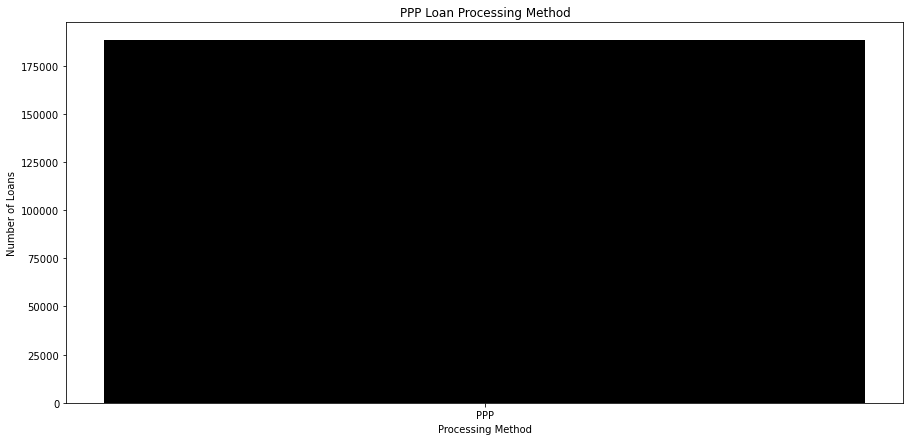

In [578]:
# Calculate the frequency of loans by processing method
method_counts = df_2020["ProcessingMethod"].value_counts()

# Create a bar plot
plt.bar(method_counts.index, method_counts.values,color='k')

# Set the title and labels
plt.title("PPP Loan Processing Method")
plt.xlabel("Processing Method")
plt.ylabel("Number of Loans")

# Show the plot
plt.show()

in 2020 only ppp method is use

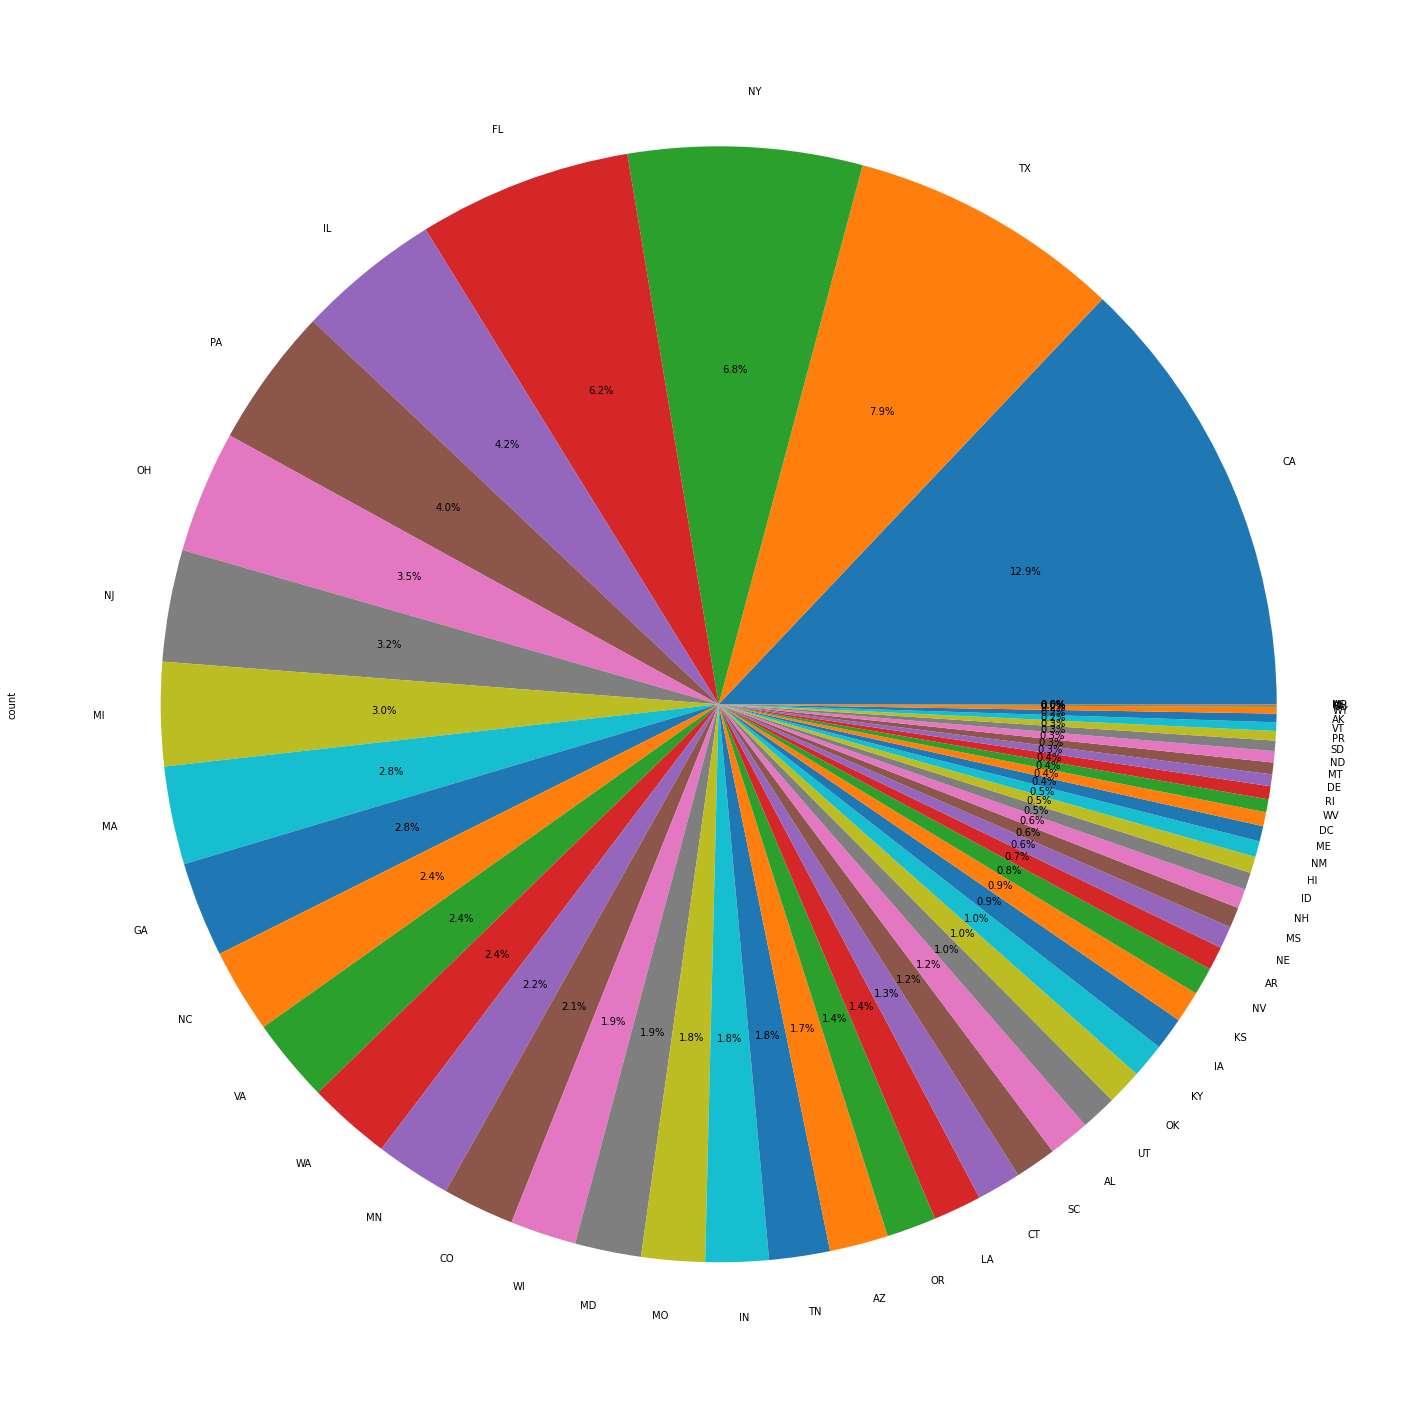

In [579]:
# Calculate the frequency of loans by state
plt.figure(figsize=(25,300))
state_counts = df_2020["BorrowerState"].value_counts().plot(kind='pie',autopct='%1.1f%%')

California (CA) has the highest number of PPP loans which is 12.9 percentage where  Texas (TX) have 7.9 and Newyork(NY) have 6.8 percenthage.

In [580]:
df_2020['LoanStatus'].value_counts()

LoanStatus
Paid in Full    188078
Name: count, dtype: int64

we can see that there are 188078 loans in the dataset with a loan status of "Paid in Full". This means that the borrowers of these loans have fully repaid their loans and do not owe any more payments to the lender.t also suggests that a significant proportion of PPP loans have been fully repaid, which is a positive sign for the success of the PPP program

In [654]:
df_2020.drop('UndisbursedAmount',axis=1,inplace=True)

In [582]:
df_2020['ServicingLenderState'].value_counts()

ServicingLenderState
OH    22143
NC    15766
CA    14025
TX    10630
NY     9787
DE     8750
PA     7569
IL     6774
UT     5643
FL     5355
SD     4886
VA     4305
NJ     4104
MO     3982
TN     3903
GA     3836
MA     3741
IN     3560
MS     3423
WA     3373
WI     3032
OK     3008
MN     2884
AL     2860
AR     2351
CO     2226
RI     2026
MI     2002
IA     1840
LA     1682
MT     1636
KS     1582
KY     1533
NE     1485
MD     1424
CT     1313
OR     1277
ND     1107
HI      954
AZ      840
ME      720
ID      672
SC      630
WV      604
NM      599
PR      569
NH      432
AK      381
NV      342
VT      214
WY      170
DC       61
GU       53
VI       10
AS        4
Name: count, dtype: int64

<AxesSubplot:xlabel='ServicingLenderState'>

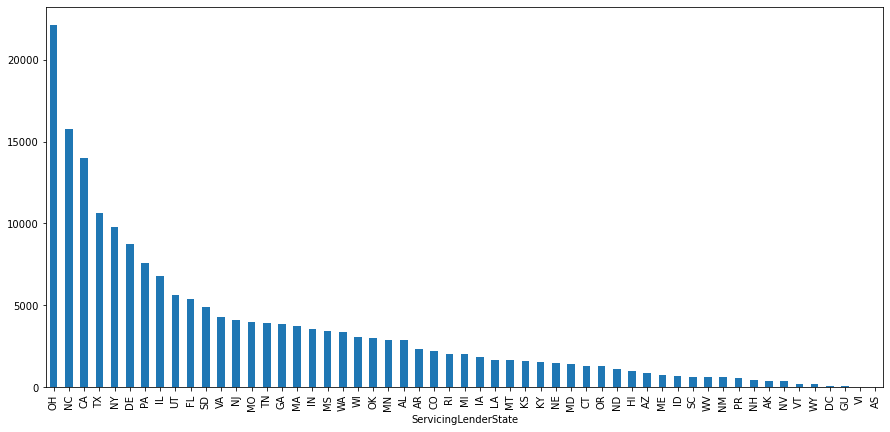

In [583]:
df_2020['ServicingLenderState'].value_counts().plot(kind='bar')

Ohio, North Carolina, and California are the top three states with the highest number of PPP loans serviced by lenders. This indicates that small businesses in these states have been among the most affected by the pandemic and have a higher demand for financial support.
There is a significant drop in loan volume between the top three states and the fourth-ranked state, Texas. This suggests that the demand for PPP loans decreases as you move down the list of states, and smaller states or those less affected by the pandemic may have fewer small businesses applying for PPP loans.

<AxesSubplot:xlabel='RuralUrbanIndicator', ylabel='count'>

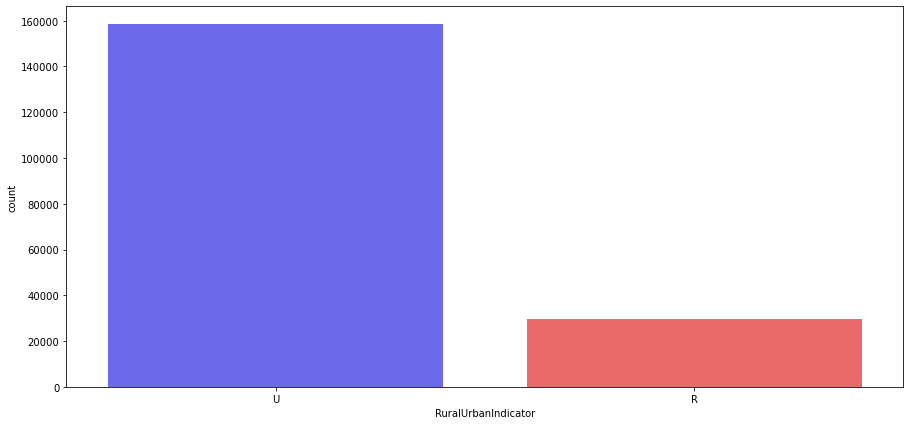

In [584]:
sns.countplot(x='RuralUrbanIndicator', data=df_2020,palette='seismic')

The majority of borrowers in the dataset are located in urban areas, with a significantly smaller proportion located in rural areas.

<AxesSubplot:xlabel='HubzoneIndicator', ylabel='count'>

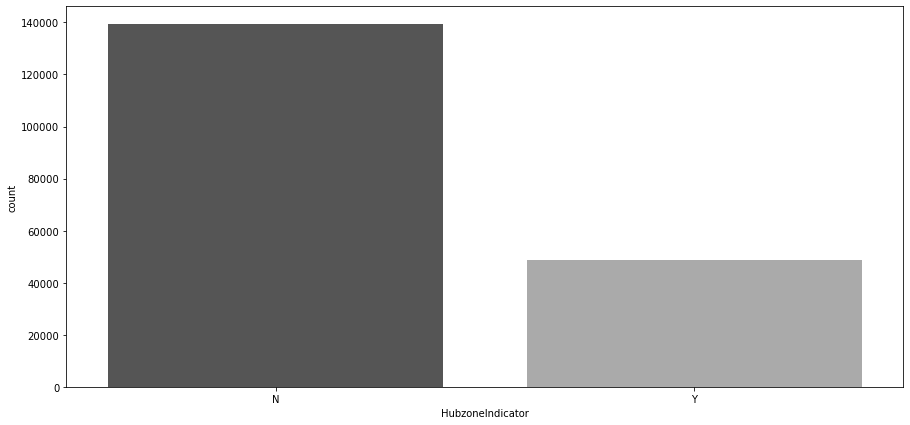

In [585]:
sns.countplot(x='HubzoneIndicator', data=df_2020,palette='binary_r')

The majority of borrowers in the dataset are not located in a HUBZone, with a significantly smaller proportion located in a HUBZone.
The proportion of loans in each HUBZone category may vary depending on factors such as geographic location, industry, or loan size.

<AxesSubplot:xlabel='LMIIndicator'>

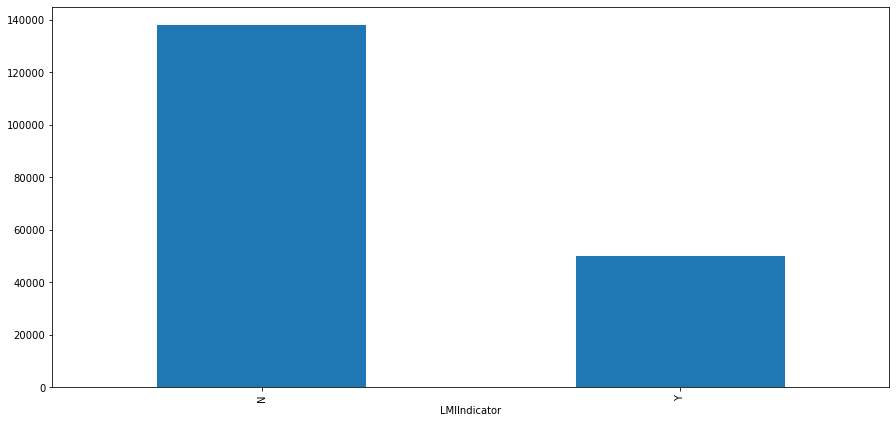

In [586]:
df_2020['LMIIndicator'].value_counts().plot(kind='bar')

 Majority of PPP loans went to businesses that are not located in low- to moderate-income areas, although a significant number of loans have been provided to businesses in these communities as well.

<AxesSubplot:xlabel='BusinessAgeDescription', ylabel='count'>

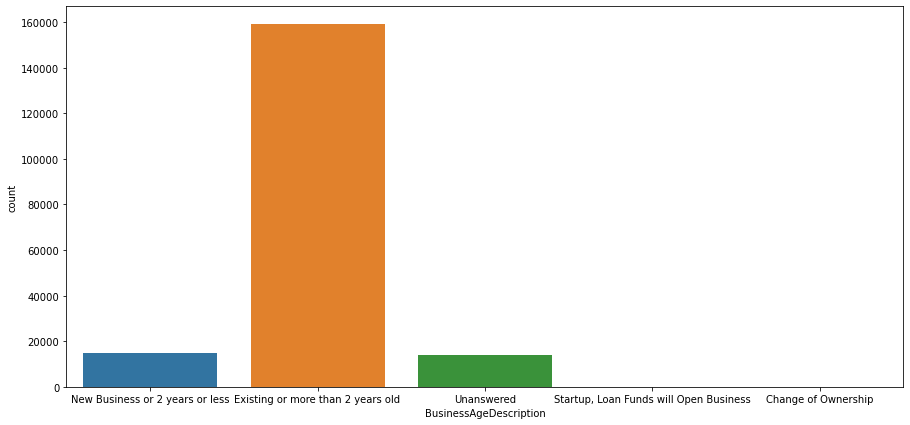

In [587]:
sns.countplot(df_2020['BusinessAgeDescription'])

Majority of PPP loan borrowers  have existing businesses that are more than two years old. A smaller number of borrowers have new businesses that are two years old or less and very less amount of ppp loan borrower have startups and business who change there ownership.

<AxesSubplot:xlabel='ProjectState'>

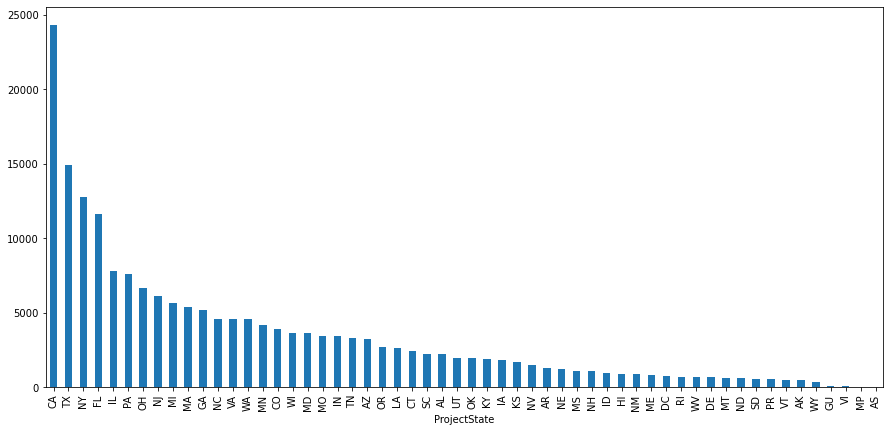

In [588]:
df_2020['ProjectState'].value_counts().plot(kind='bar')

The values in this column show that the highest number of PPP loans were granted to businesses located in California followed by Texas , New York , Florida and Illinois.

<AxesSubplot:xlabel='Race'>

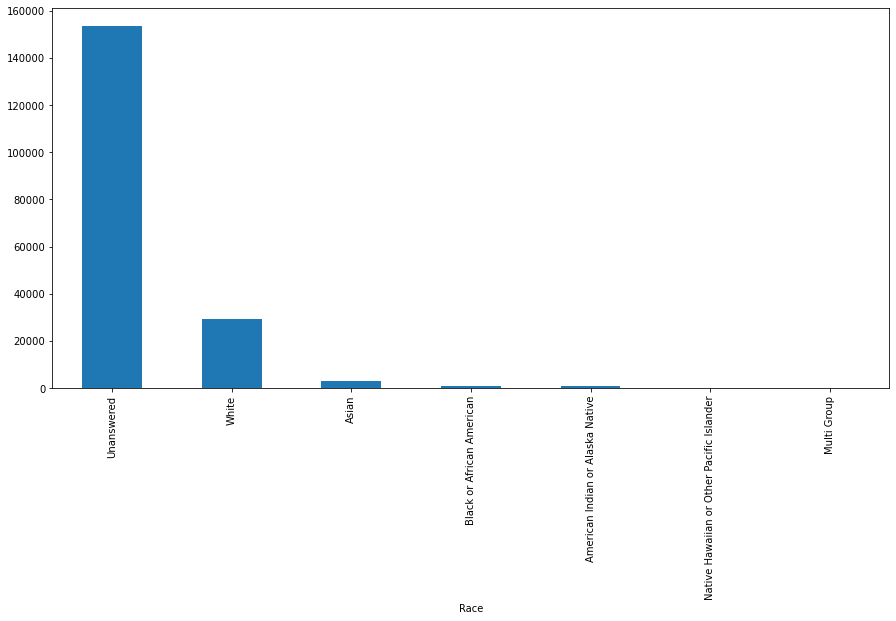

In [589]:
df_2020['Race'].value_counts().plot(kind='bar')

The majority of the loans had an unanswered race question. Among those who did provide information on their race, the largest group was White , followed by Asian , Black or African American , American Indian or Alaska Native , and Native Hawaiian or Other Pacific Islander. 

<AxesSubplot:xlabel='Ethnicity'>

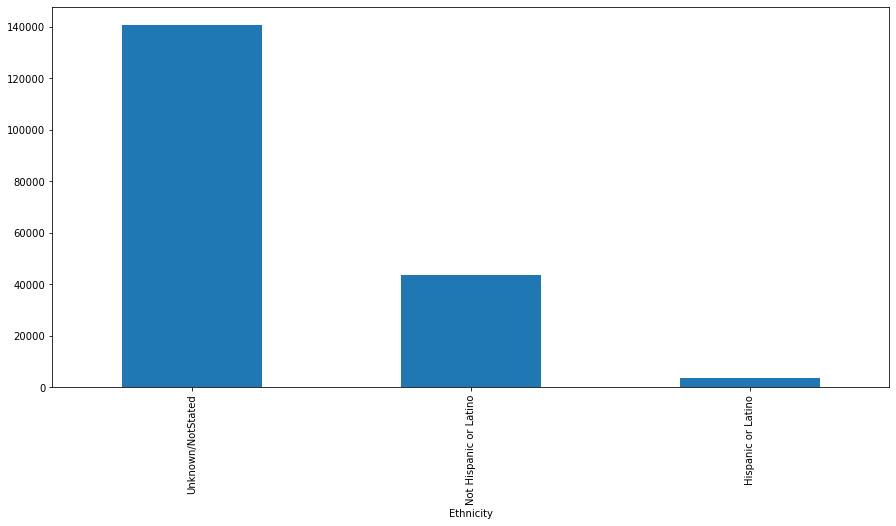

In [590]:
df_2020['Ethnicity'].value_counts().plot(kind='bar')

The majority of the loans  had an unknown or not stated ethnicity. Among those who did provide information on their ethnicity, the largest group was Not Hispanic or Latino followed by Hispanic or Latino.

<AxesSubplot:xlabel='BusinessType'>

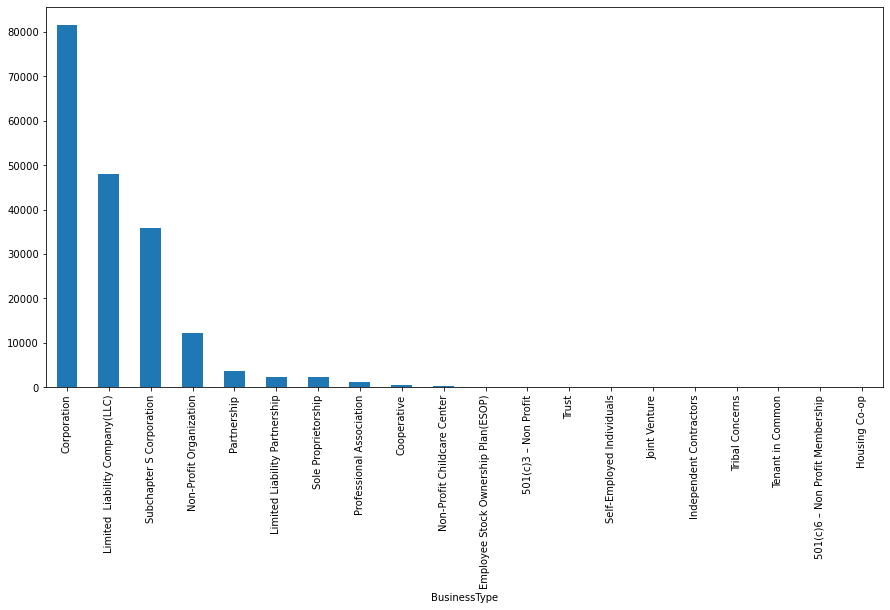

In [591]:
df_2020['BusinessType'].value_counts().plot(kind='bar')

In [592]:
df_2020['BusinessType'].value_counts()

BusinessType
Corporation                            81601
Limited  Liability Company(LLC)        47946
Subchapter S Corporation               35794
Non-Profit Organization                12162
Partnership                             3634
Limited Liability Partnership           2428
Sole Proprietorship                     2290
Professional Association                1113
Cooperative                              489
Non-Profit Childcare Center              187
Employee Stock Ownership Plan(ESOP)      138
501(c)3 – Non Profit                      97
Trust                                     87
Self-Employed Individuals                 54
Joint Venture                             19
Independent Contractors                   19
Tribal Concerns                           10
Tenant in Common                           7
501(c)6 – Non Profit Membership            2
Housing Co-op                              1
Name: count, dtype: int64

The majority of the loans were given to Corporations (81,601), followed by Limited Liability Companies (LLCs) (47,946) and Subchapter S Corporations (35,794). Non-Profit Organizations also received a significant number of loans (12,162).

It's interesting to note that only a small number of loans were given to Sole Proprietorships (2,290) and Self-Employed Individuals (54), despite these being among the most common types of small businesses.

<AxesSubplot:xlabel='Gender'>

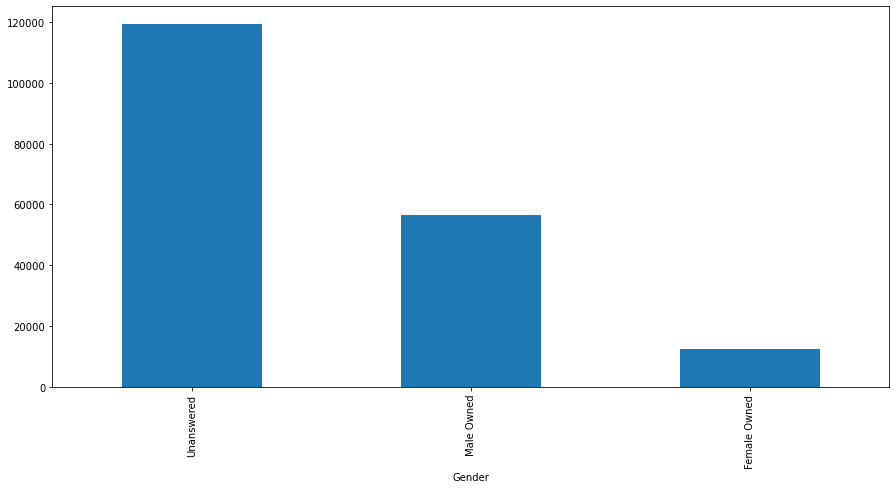

In [593]:
df_2020['Gender'].value_counts().plot(kind='bar')

The data shows that a large portion of the loans did not report the gender of the business owner . Among those that did report gender, the majority were owned by men  compared to women .
These findings suggest that male-owned businesses were more likely to receive PPP loans than female-owned businesses

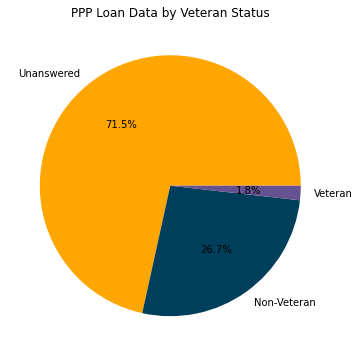

In [594]:
veteran_freq = df_2020['Veteran'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(veteran_freq.values, labels=veteran_freq.index, autopct='%1.1f%%', colors=['#ffa600', '#003f5c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43'])
plt.title('PPP Loan Data by Veteran Status')
plt.show()

From the pie chart, we can see that the majority of PPP loans were distributed to borrowers who did not report their veteran status. Among those who did report their status, a higher percentage of loans were distributed to veterans than non-veterans. This suggests that there may be a preference for veterans in PPP loan distribution.

# Bivariate analysis

<AxesSubplot:xlabel='BorrowerState'>

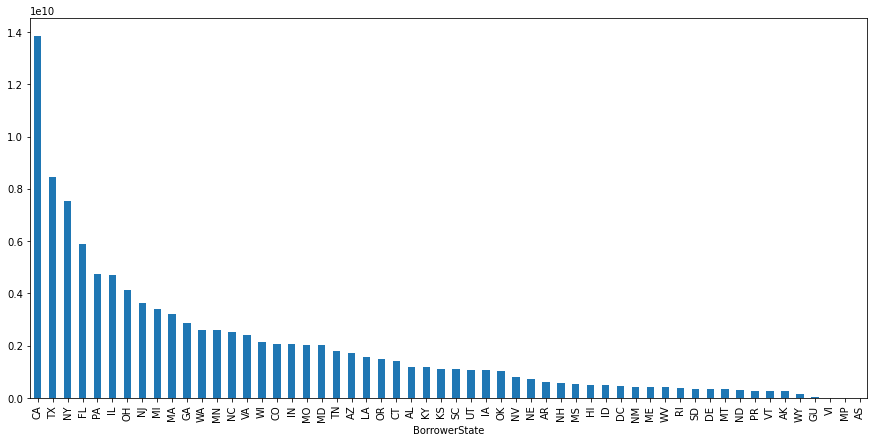

In [595]:
df_2020.groupby('BorrowerState')['CurrentApprovalAmount'].sum().sort_values(ascending=False).plot(kind='bar')

In [596]:
df_2020.groupby('BorrowerState')['CurrentApprovalAmount'].sum().sort_values(ascending=False).head()

BorrowerState
CA    1.385643e+10
TX    8.461417e+09
NY    7.529765e+09
FL    5.907371e+09
PA    4.729182e+09
Name: CurrentApprovalAmount, dtype: float64

This output shows the total amount of loan disbursements for each state in the BorrowerState column of the PPP loan dataset. The highest disbursements were in California (CA) with a total of approximately $13.9 billion, followed by Texas (TX) with approximately $8.5 billion and New York (NY) with approximately $7.5 billion. Florida (FL), Pennsylvania (PA), Illinois (IL), Ohio (OH), and New Jersey (NJ) also had high disbursements ranging from approximately $3.6 billion to $5.9 billion

<AxesSubplot:xlabel='RuralUrbanIndicator'>

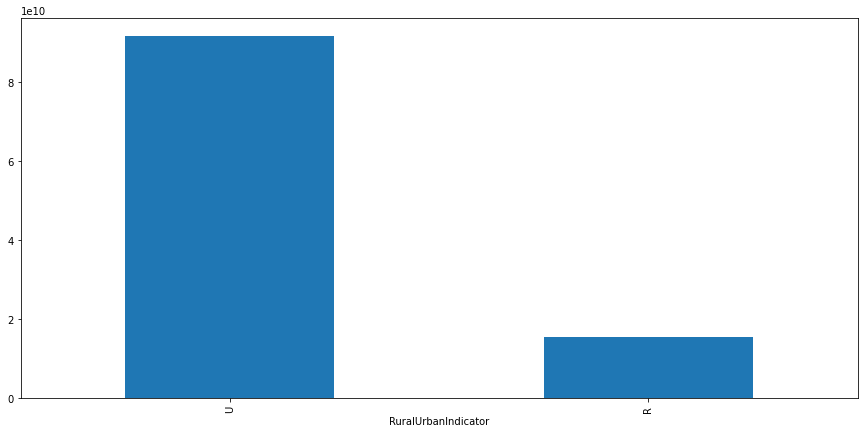

In [597]:
df_2020.groupby('RuralUrbanIndicator')['CurrentApprovalAmount'].sum().sort_values(ascending=False).plot(kind='bar')

This indicates that the majority of the loans in the dataset were provided to borrowers in urban areas, as the total loan amount for borrowers classified as "U" (urban) is significantly higher than the total loan amount for borrowers classified as "R" (rural).

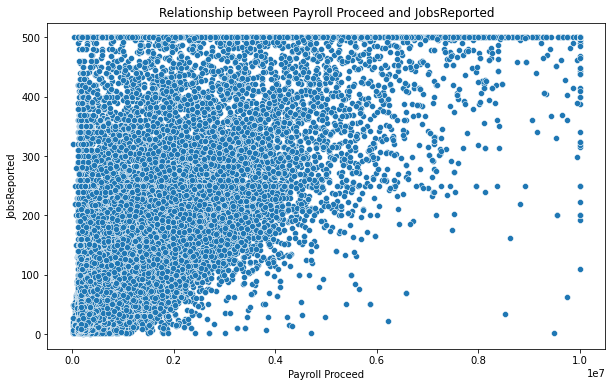

In [598]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_2020, x='PAYROLL_PROCEED', y='JobsReported')
plt.title('Relationship between Payroll Proceed and JobsReported')
plt.xlabel('Payroll Proceed')
plt.ylabel('JobsReported')
plt.show()

Inference-This suggests that businesses that have higher payroll expenses tend to have more employees. However, it is important to note that there are also several data points where the payroll expense is high but the number of jobs reported is relatively low, indicating that there are other factors that may influence employment in addition to payroll.

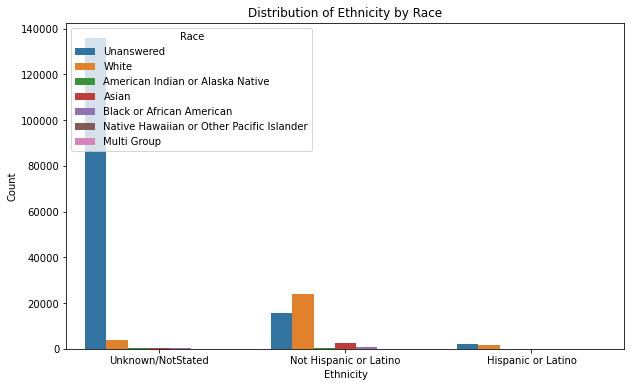

In [599]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_2020, x='Ethnicity', hue='Race')
plt.title('Distribution of Ethnicity by Race')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

Inference-The majority of respondents did not answer or stated their ethnicity as "Unknown/NotStated". Among those who did state their ethnicity, the largest racial group was White, followed by Black or African American, and then Asian. The distribution of race within the Hispanic or Latino group was fairly evenly spread between White, Black or African American, and Unknown/NotStated. The Native Hawaiian or Other Pacific Islander group had a very small sample size.

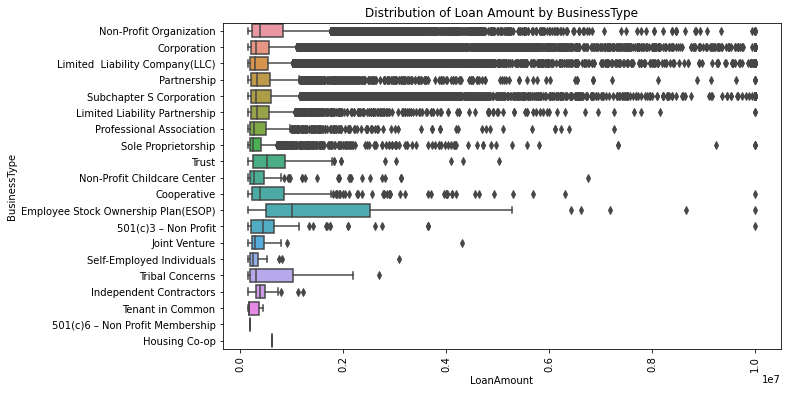

In [600]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_2020, y='BusinessType', x='CurrentApprovalAmount')
plt.title('Distribution of Loan Amount by BusinessType')
plt.ylabel('BusinessType')
plt.xlabel('LoanAmount')
plt.xticks(rotation=90)
plt.show()

Inference-The above graph shows CurrentApprovalAmount variable by BusinessType .From the result, it can be inferred that most of the loans were approved for Corporations (81601), followed by Limited Liability Company(LLC) (47946) and Subchapter S Corporation (35794). This can suggest that these types of businesses are more likely to apply for and receive PPP loans.

The plot also shows that there are some outliers in each category, indicating that there are some businesses that received significantly higher or lower loan amounts compared to the median for their category.
Overall, this plot provides useful insights into the distribution of loan amounts across different business types.

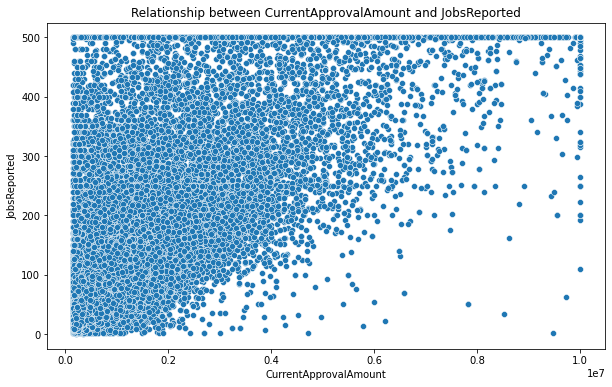

In [601]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_2020, x='CurrentApprovalAmount', y='JobsReported')
plt.title('Relationship between CurrentApprovalAmount and JobsReported')
plt.xlabel('CurrentApprovalAmount')
plt.ylabel('JobsReported')
plt.show()

Inference-The scatterplot above shows the relationship between CurrentApprovalAmount and JobsReported. It seems that there is a positive correlation between these two variables, meaning that as the loan amount increases, the number of jobs reported also tends to increase. However, the relationship doesn't seem to be very strong, as there is a lot of variation in the data points.As it suggests that a larger loan amount might lead to an increase in employment opportunities. 

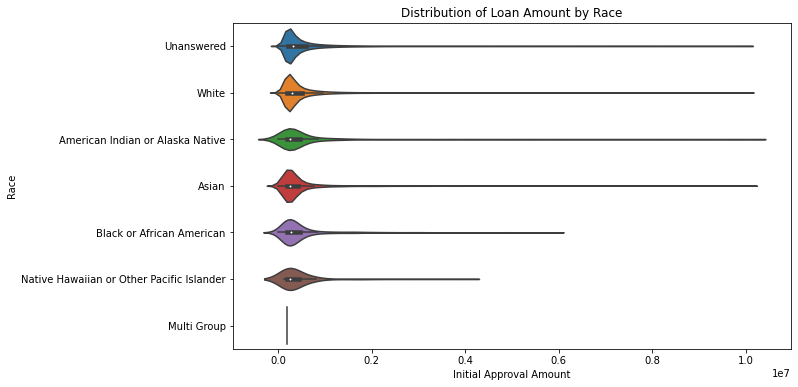

In [602]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_2020, y='Race', x='InitialApprovalAmount')
plt.title('Distribution of Loan Amount by Race')
plt.ylabel('Race')
plt.xlabel('Initial Approval Amount')
plt.show()

Inference-The plot shows that the median loan amount for each race is roughly similar, with the exception of the "Asian" race category which has a slightly higher median loan amount. However, the distribution of loan amounts varies widely between different races. The "Black or African American" and "American Indian or Alaska Native" categories have a wider distribution with more loans granted at the lower end of the loan amount spectrum, while the "Asian" and "White" categories have more loans granted at higher amounts. The "Native Hawaiian or Other Pacific Islander" category has the smallest number of loans granted and also the smallest range of loan amounts. Overall, this plot shows that there are differences in the distribution of loan amounts between different race categories.

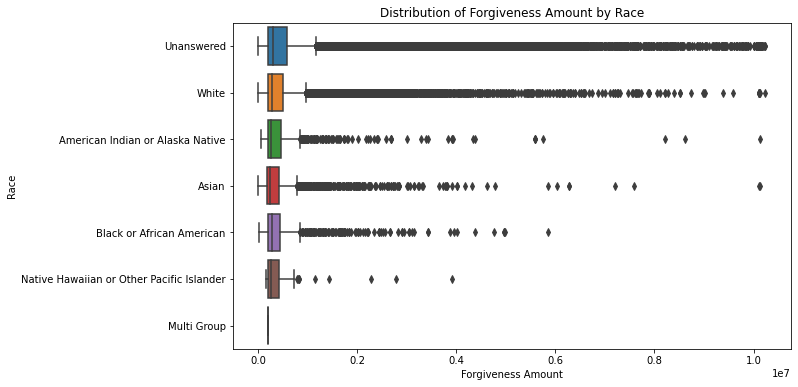

In [603]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2020, x='ForgivenessAmount', y='Race')
plt.title('Distribution of Forgiveness Amount by Race')
plt.xlabel('Forgiveness Amount')
plt.ylabel('Race')
plt.show()

Inference-This box plot shows the distribution of forgiveness amounts for loans granted to different races. The plot shows that the median forgiveness amount for each race is roughly similar, with the exception of the "Asian" race category which has a slightly higher median forgiveness amount. However, the distribution of forgiveness amounts varies widely between different races.Overall, this plot shows that there are differences in the distribution of forgiveness amounts between different race categories.

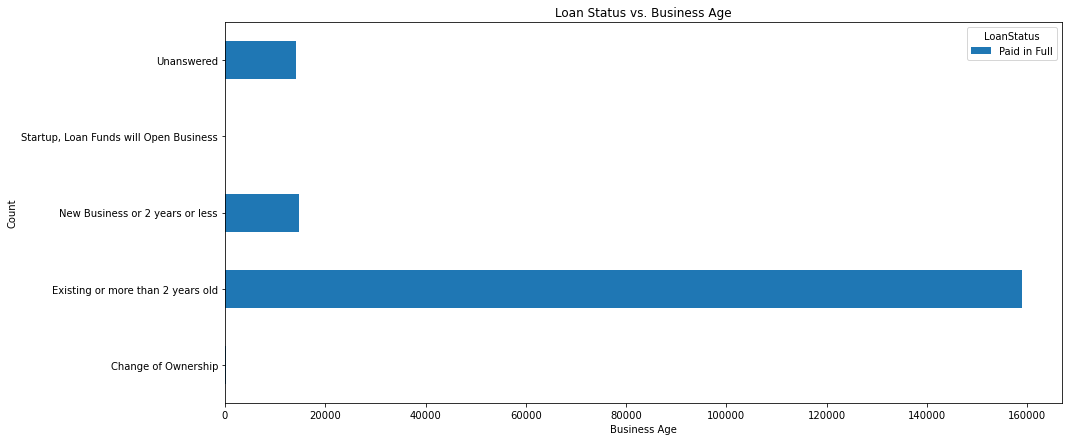

In [604]:
df_2020.groupby("BusinessAgeDescription")["LoanStatus"].value_counts().unstack().plot(kind="barh", stacked=True)
plt.xlabel("Business Age")
plt.ylabel("Count")
plt.title("Loan Status vs. Business Age")
plt.show()


Inference-From the chart, we can infer that the majority of the loans were given to businesses that have been in operation for more than two years. and these loans were paid in full.This analysis indicates that the business age category is a significant factor in determining the loan status, with new businesses and those in operation for two years or less being riskier than established businesses.

<Figure size 720x432 with 0 Axes>

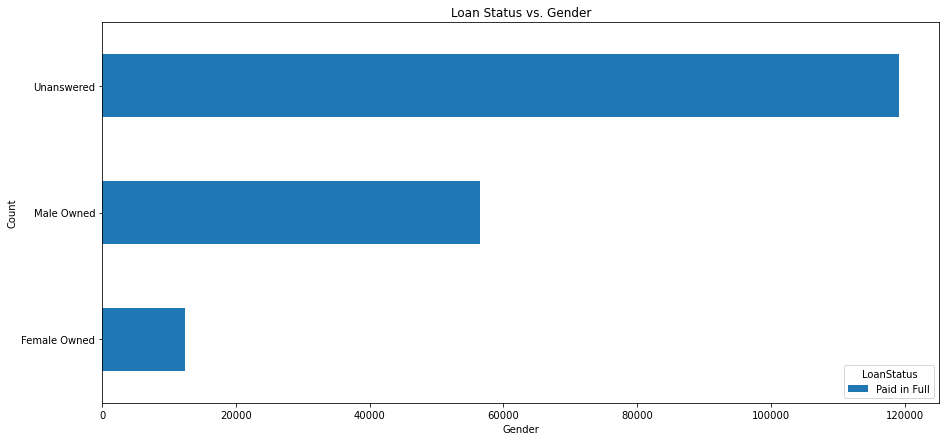

In [605]:
plt.figure(figsize=(10,6))
df_2020.groupby("Gender")["LoanStatus"].value_counts().unstack().plot(kind="barh", stacked=True)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status vs. Gender")
plt.show()

Inference-From the chart, we can infer that the majority of the loans were given to male-owned businesses, followed by female-owned businesses. Most of these loans were paid  in full.
It is possible that the loan status may vary across different gender identities.

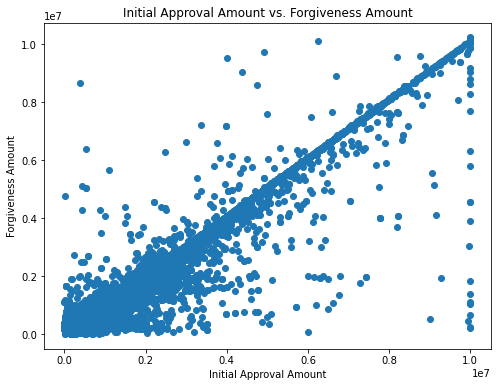

In [606]:
plt.figure(figsize=(8,6))
plt.scatter(df_2020["InitialApprovalAmount"], df_2020["ForgivenessAmount"])
plt.xlabel("Initial Approval Amount")
plt.ylabel("Forgiveness Amount")
plt.title("Initial Approval Amount vs. Forgiveness Amount")
plt.show()

Inference-The scatter plot shows the relationship between the initial approval amount and the forgiveness amount for the loans in the dataset. It appears that there is a positive linear relationship between the two variables, indicating that higher initial approval amounts tend to correspond to higher forgiveness amounts. However, there is also a lot of variability in the data, with some loans receiving relatively low forgiveness amounts despite high initial approval amounts, and vice versa.

<Figure size 576x432 with 0 Axes>

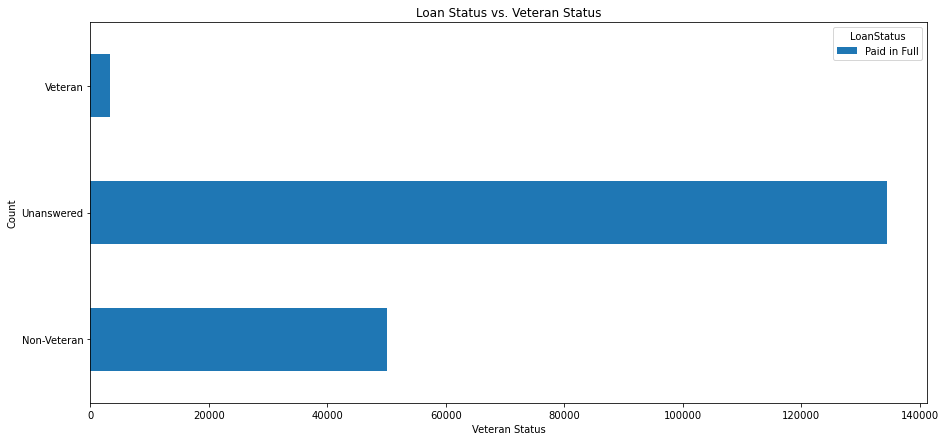

In [607]:
plt.figure(figsize=(8,6))
df_2020.groupby("Veteran")["LoanStatus"].value_counts().unstack().plot(kind="barh", stacked=True)
plt.xlabel("Veteran Status")
plt.ylabel("Count")
plt.title("Loan Status vs. Veteran Status")
plt.show()

Inference-This graph shows the distribution of loan statuses for veterans and non-veterans. We can see that loans for non-veterans are more likely to have been paid in full.

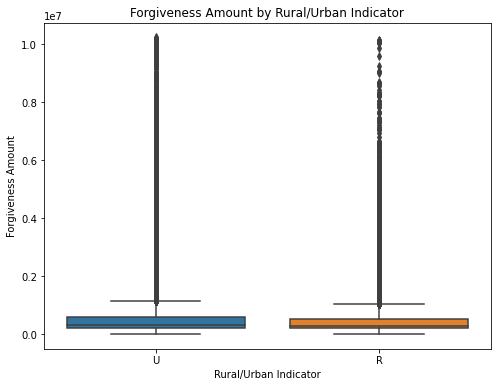

In [608]:
plt.figure(figsize=(8,6))
sns.boxplot(x="RuralUrbanIndicator", y="ForgivenessAmount", data=df_2020)
plt.xlabel("Rural/Urban Indicator")
plt.ylabel("Forgiveness Amount")
plt.title("Forgiveness Amount by Rural/Urban Indicator")
plt.show()


Inference-The median forgiveness amount for both rural and urban businesses is approximately the same, but the range of forgiveness amounts is wider for urban businesses. The boxplots for both groups overlap significantly, suggesting that the rural/urban status of the borrower's business may not be a strong predictor of forgiveness amount.

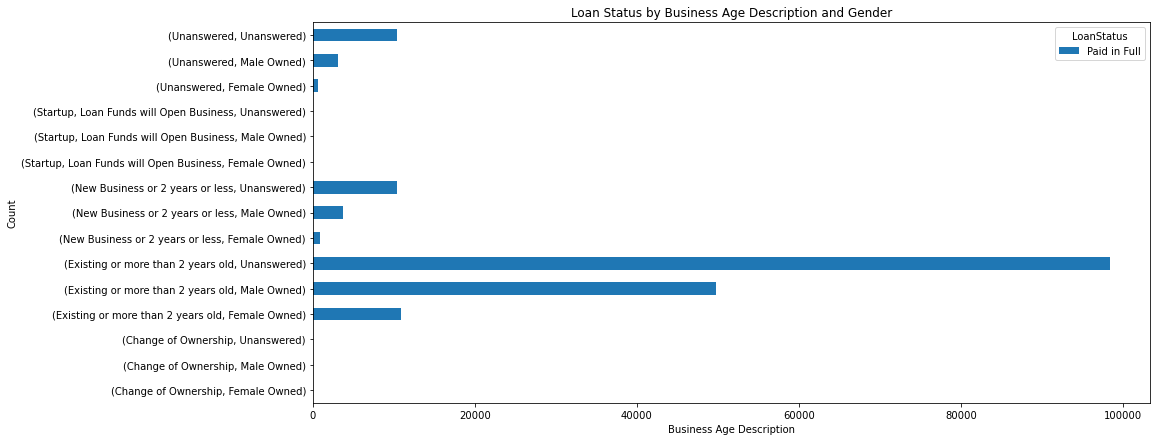

In [609]:
df_2020.groupby(["BusinessAgeDescription", "Gender"])["LoanStatus"].value_counts().unstack().plot(kind="barh", stacked=True)
plt.xlabel("Business Age Description")
plt.ylabel("Count")
plt.title("Loan Status by Business Age Description and Gender")
plt.show()

Inference-Each bar represents a unique combination of Business Age Description and Gender, and the stacked bars show the count of loan statuses for each combination. It can be inferred from the plot that the loan approval rates are higher for both Male and Female business owners in the Mature Business Age Description. On the other hand, the loan approval rates are lower for the business owners of Unknown Gender in Emerging Business Age Description.

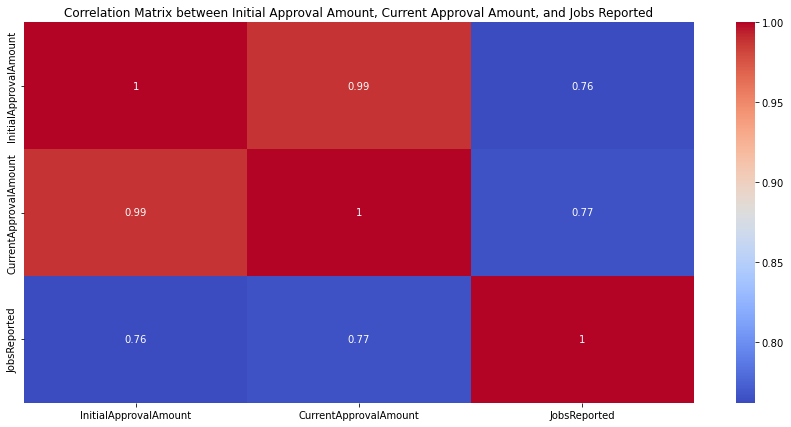

In [610]:
corr = df_2020[["InitialApprovalAmount", "CurrentApprovalAmount", "JobsReported"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix between Initial Approval Amount, Current Approval Amount, and Jobs Reported")
plt.show()

Inference-In this case, the heatmap shows that there is a strong positive correlation between Initial Approval Amount and Current Approval Amount (correlation coefficient of 0.99). This means that as the initial approval amount increases, the current approval amount also tends to increase.

There is also a moderate positive correlation between Jobs Reported and Initial Approval Amount (correlation coefficient of 0.76) as well as between Jobs Reported and Current Approval Amount (correlation coefficient of 0.77). This suggests that as the loan amounts increase, the number of jobs reported also tends to increase.

# Multvariate Analysis

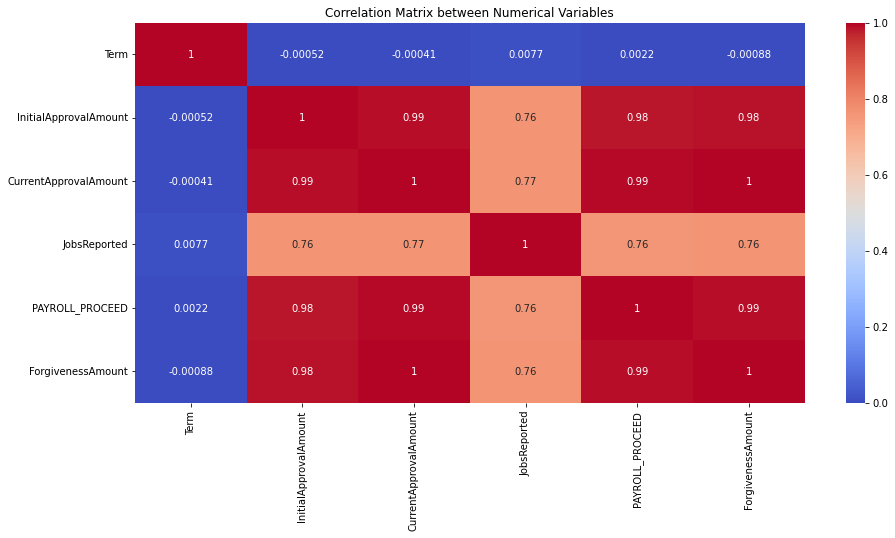

In [611]:
corr = df_2020.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, cmap="coolwarm",annot=True)
plt.title("Correlation Matrix between Numerical Variables")
plt.show()

Inference-From the heatmap, we can see that there is a strong positive correlation between the initial and current approval amounts, as well as between the initial approval amount and PAYROLL_PROCEED. This indicates that as the initial approval amount increases, the current approval amount and PAYROLL_PROCEED also tend to increase. There is also a weak negative correlation between Term and forgiveness amount,initial approval amount,CurrentApprovalAmount

In [655]:
cat=df_2020.select_dtypes(include=object)
num=df_2020.select_dtypes(include=np.number)

In [613]:
cat

,SBAOfficeCode,ProcessingMethod,BorrowerState,LoanStatus,ServicingLenderState,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectState,CD,NAICSCode,Race,Ethnicity,BusinessType,OriginatingLender,OriginatingLenderState,Gender,Veteran
532229,460,PPP,NC,Paid in Full,NC,U,N,N,New Business or 2 years or less,NC,NC-06,813110.0,Unanswered,Unknown/NotStated,Non-Profit Organization,First-Citizens Bank & Trust Company,NC,Unanswered,Unanswered
691147,549,PPP,OH,Paid in Full,OH,U,Y,Y,Existing or more than 2 years old,OH,OH-11,236220.0,White,Unknown/NotStated,Corporation,"JPMorgan Chase Bank, National Association",OH,Male Owned,Unanswered
954863,563,PPP,WI,Paid in Full,MN,U,N,Y,Existing or more than 2 years old,WI,WI-03,541810.0,Unanswered,Unknown/NotStated,Limited Liability Company(LLC),"Merchants Bank, National Association",MN,Unanswered,Unanswered
166222,811,PPP,CO,Paid in Full,OH,U,N,N,Existing or more than 2 years old,CO,CO-05,441110.0,Unanswered,Unknown/NotStated,Corporation,"JPMorgan Chase Bank, National Association",OH,Unanswered,Unanswered
826167,610,PPP,TX,Paid in Full,LA,U,N,N,Existing or more than 2 years old,TX,TX-24,332322.0,Unanswered,Unknown/NotStated,Partnership,Origin Bank,LA,Unanswered,Unanswered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,988,PPP,AZ,Paid in Full,MT,U,N,N,Existing or more than 2 years old,AZ,AZ-04,621610.0,Unanswered,Unknown/NotStated,Non-Profit Organization,Glacier Bank,MT,Unanswered,Unanswered
469768,515,PPP,MI,Paid in Full,MI,R,N,N,New Business or 2 years or less,MI,MI-07,515112.0,Unanswered,Unknown/NotStated,Corporation,County National Bank,MI,Unanswered,Unanswered
479376,508,PPP,MN,Paid in Full,CO,U,N,N,Existing or more than 2 years old,MN,MN-02,541990.0,Unanswered,Unknown/NotStated,Subchapter S Corporation,"Citywide Banks, A Division of HTLF Bank",CO,Unanswered,Unanswered
45805,912,PPP,CA,Paid in Full,MT,U,N,N,Unanswered,CA,CA-15,541940.0,Unanswered,Unknown/NotStated,Partnership,Glacier Bank,MT,Male Owned,Non-Veteran


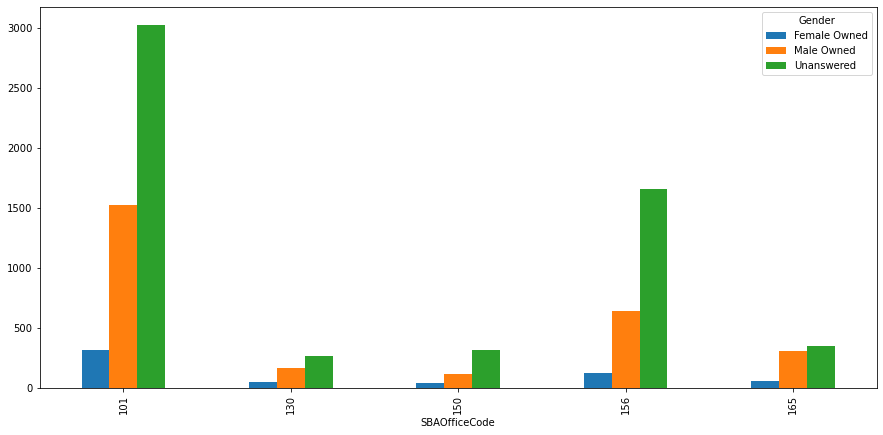

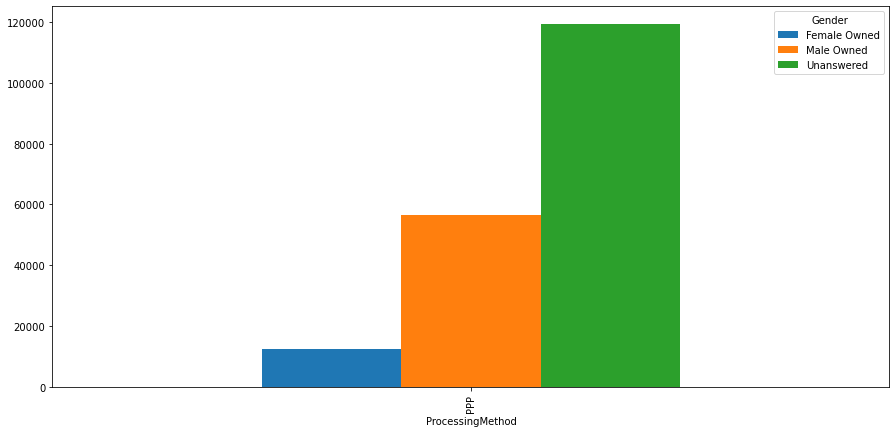

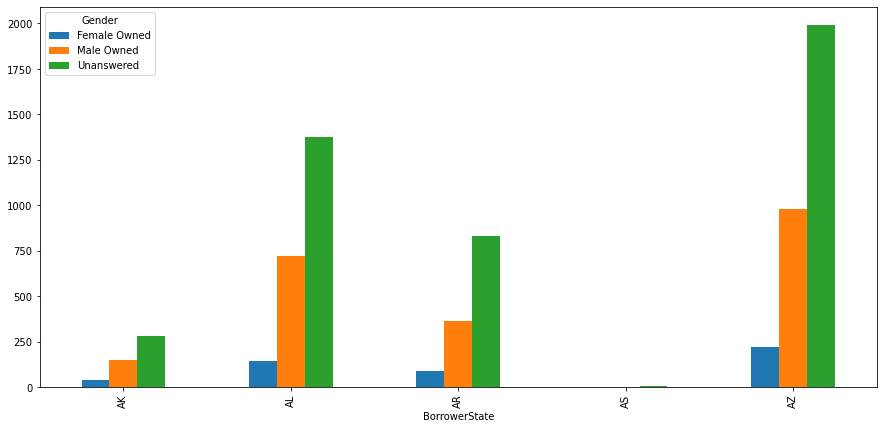

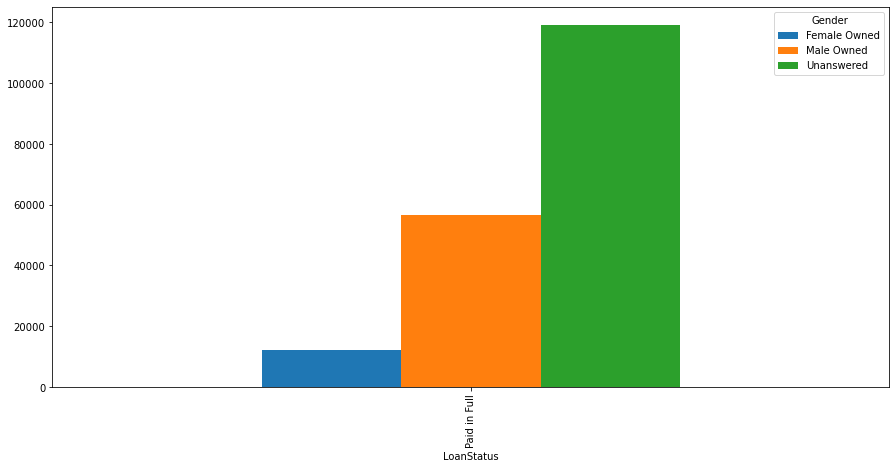

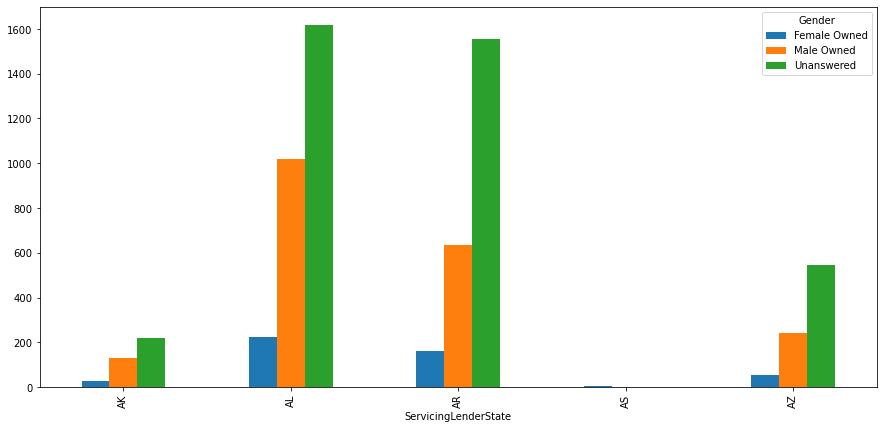

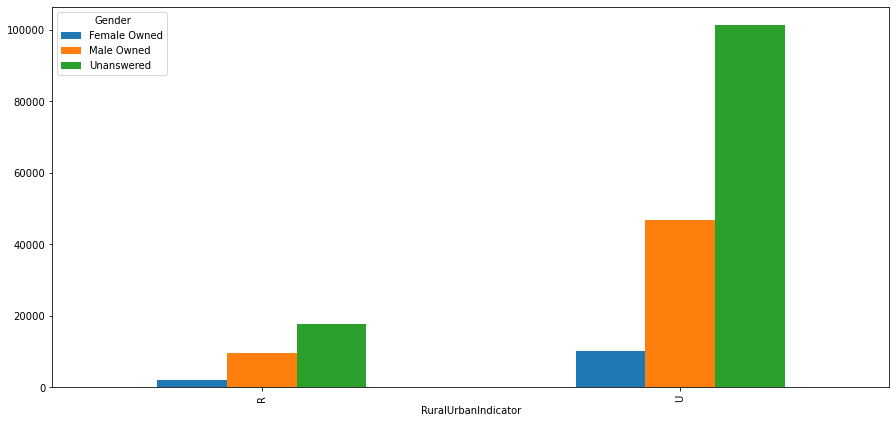

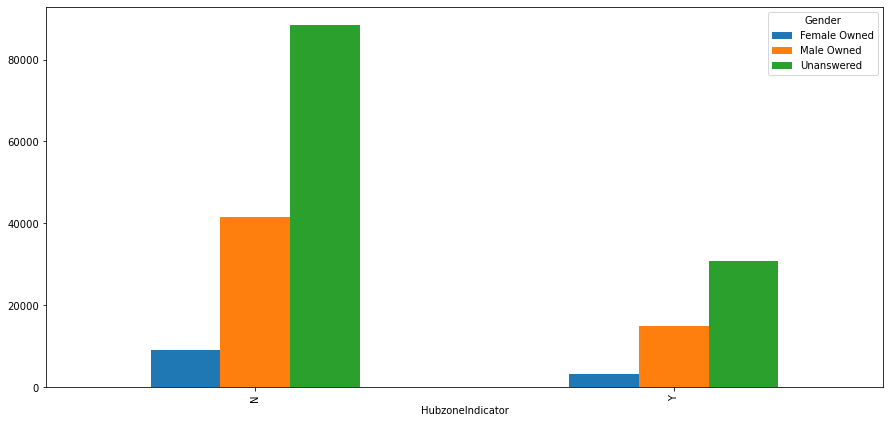

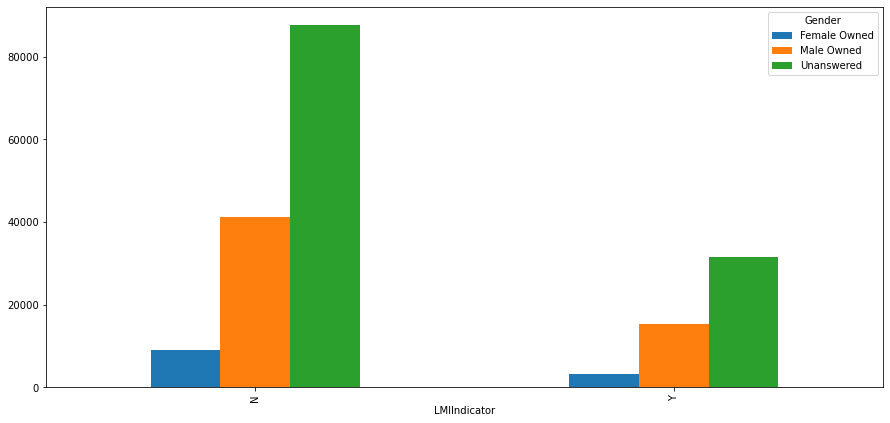

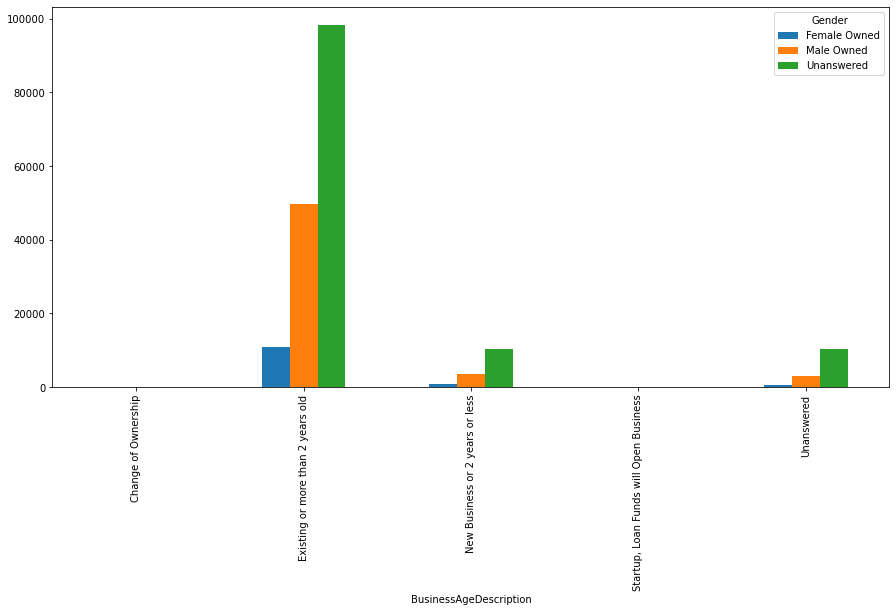

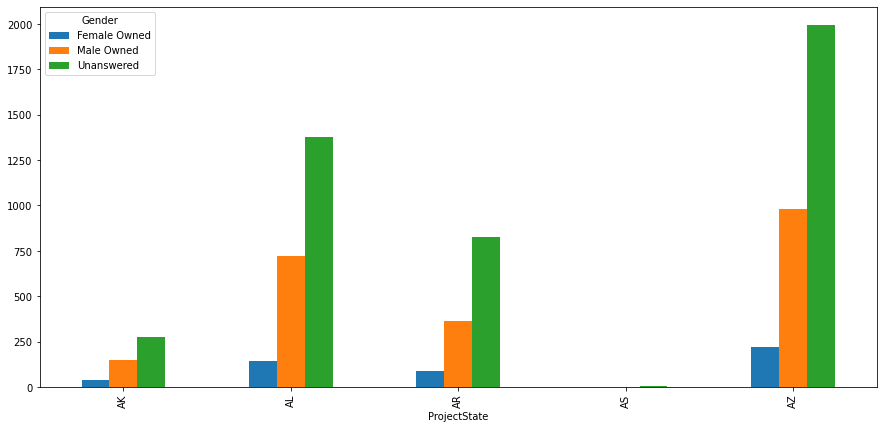

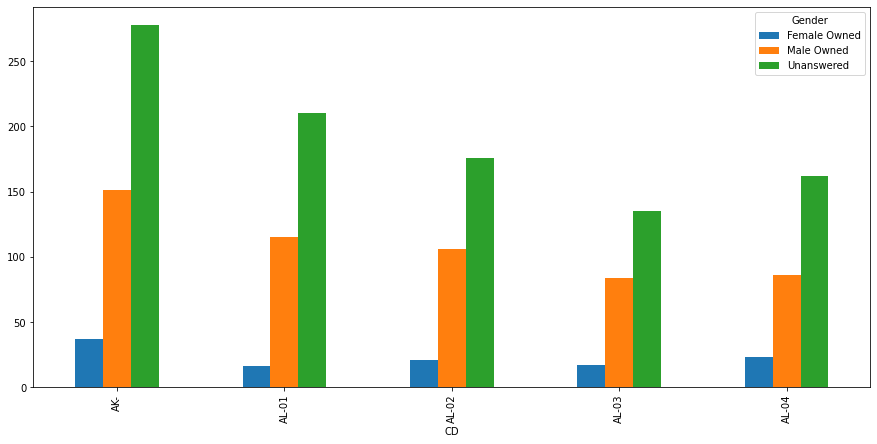

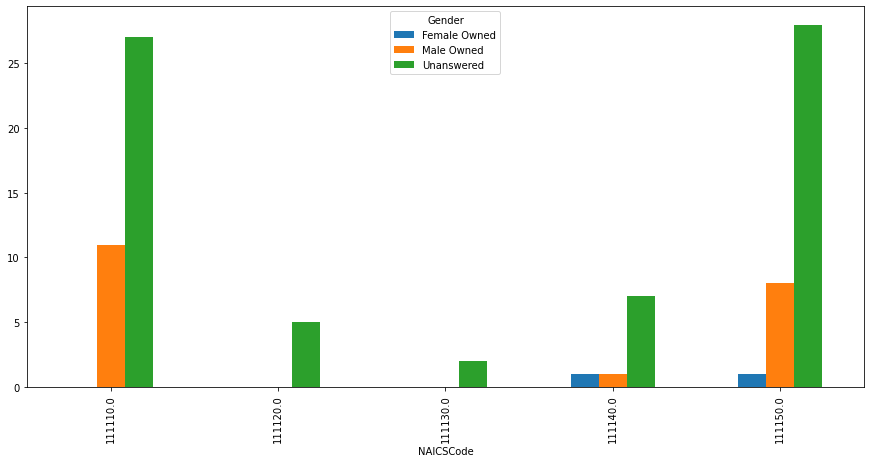

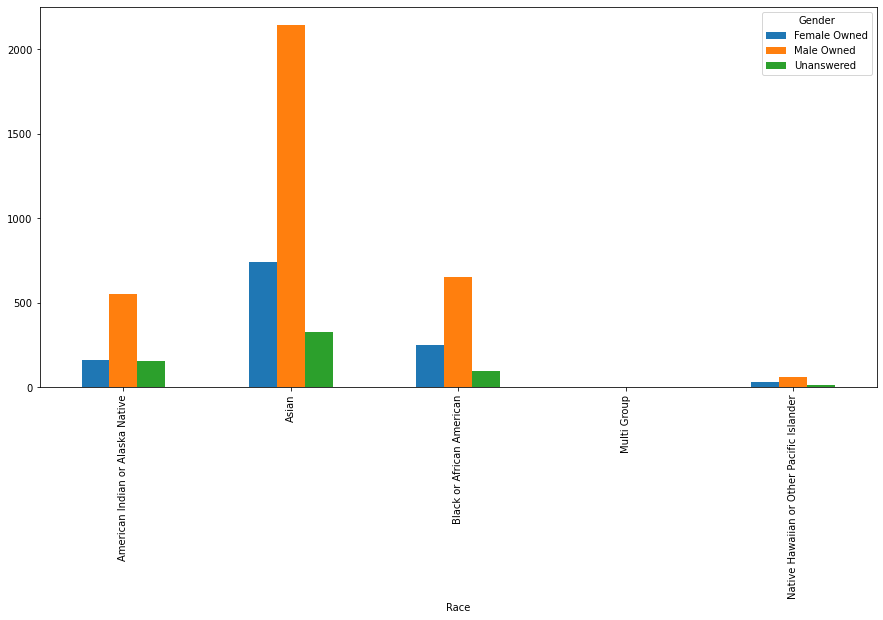

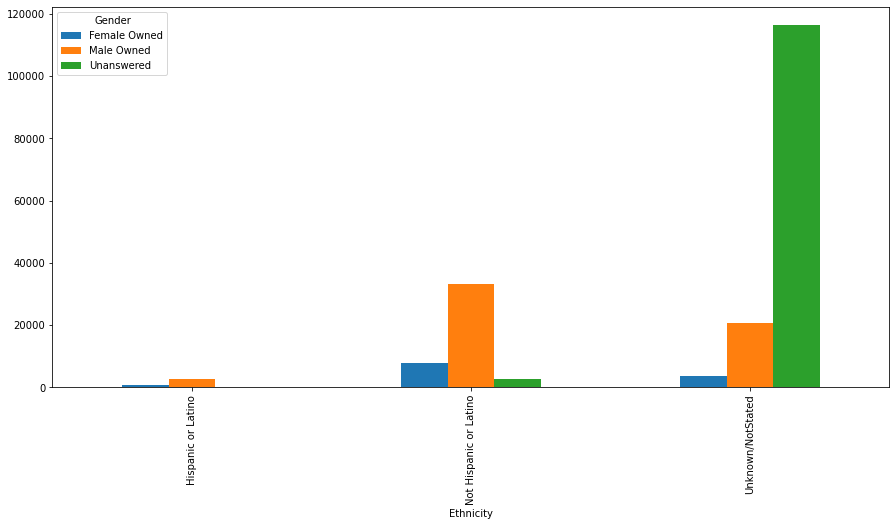

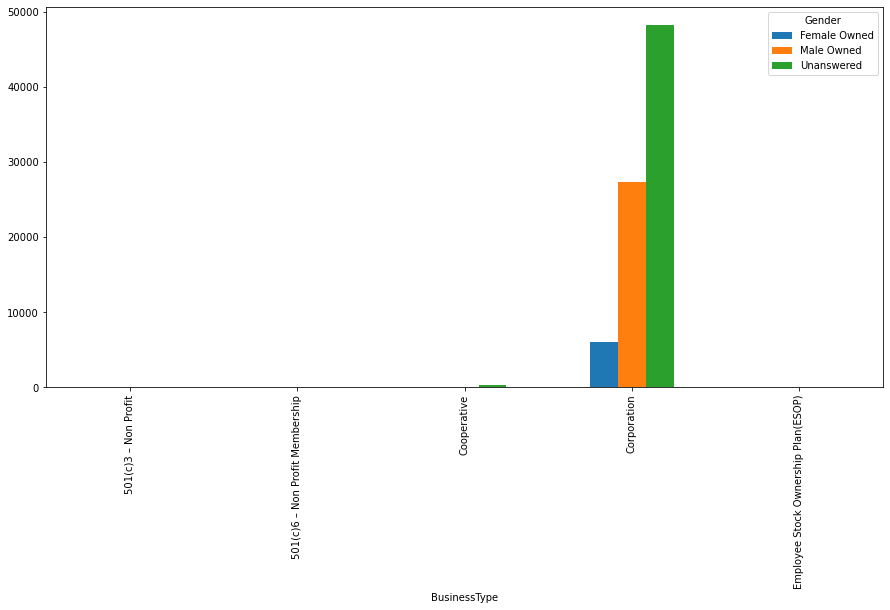

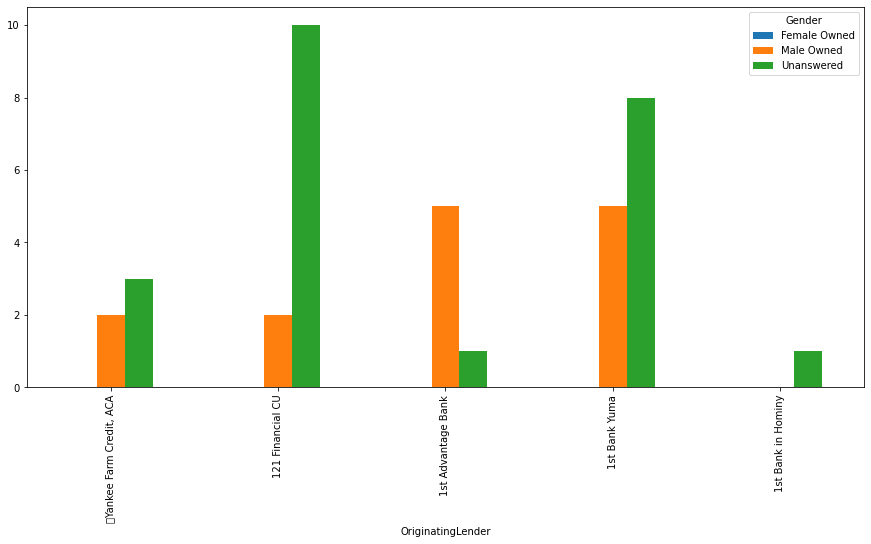

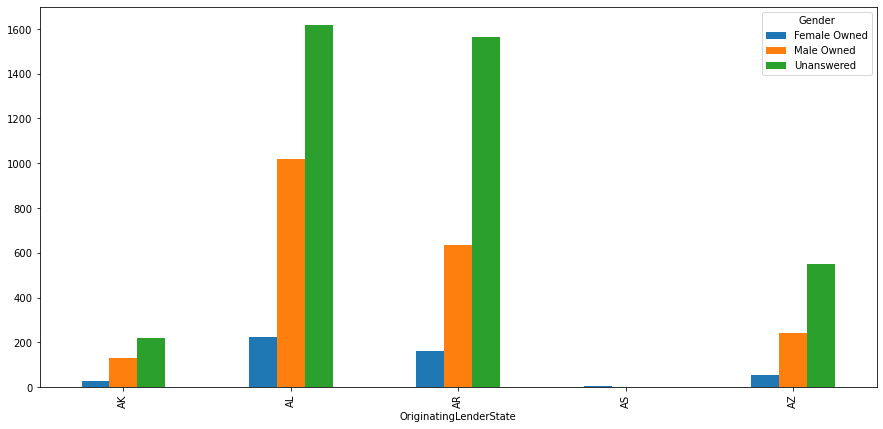

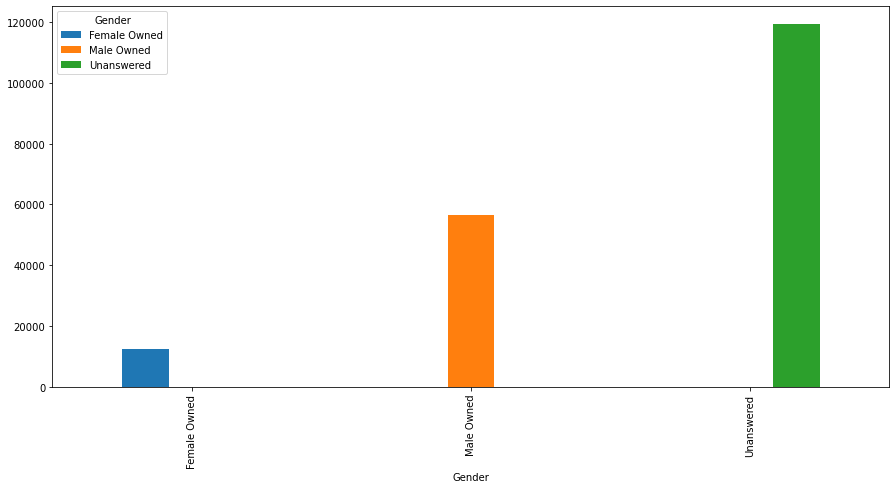

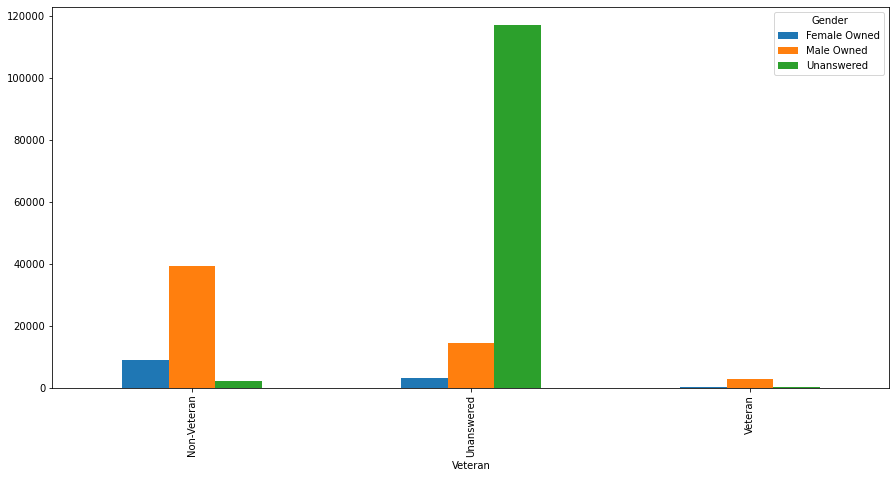

In [614]:
for i in cat:
    pd.crosstab(cat[i],cat['Gender']).head().plot(kind='bar')

The plot shows the distribution of each categorical variable by gender, providing insights into any differences or similarities between genders in the frequency of each category.

# Encoding

In [656]:
cat.drop(['ProcessingMethod','LoanStatus'],axis=1,inplace=True)

In [657]:
# Define the columns to be one-hot encoded
cols_to_encode = ['RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator','Ethnicity', 'Gender', 'Veteran']

# Apply one-hot encoding to the selected columns
encoded_df = pd.get_dummies(cat[cols_to_encode], drop_first=True).astype(int)

# Concatenate the encoded dataframe with the original dataframe
sample_2020_cat_encoded = pd.concat([df_2020.drop(cols_to_encode, axis=1), encoded_df], axis=1)

In [659]:
sample_2020_cat_encoded.head()

,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerState,LoanStatusDate,LoanStatus,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderState,BusinessAgeDescription,ProjectState,CD,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderState,ForgivenessAmount,ForgivenessDate,RuralUrbanIndicator_U,HubzoneIndicator_Y,LMIIndicator_Y,Ethnicity_Not Hispanic or Latino,Ethnicity_Unknown/NotStated,Gender_Male Owned,Gender_Unanswered,Veteran_Unanswered,Veteran_Veteran
532229,2020-04-28,460,PPP,NC,2021-05-14,Paid in Full,24,348000.0,348000.0,NC,New Business or 2 years or less,NC,NC-06,103.0,813110.0,Unanswered,348000.0,Non-Profit Organization,First-Citizens Bank & Trust Company,NC,351108.16,2021-03-31,1,0,0,0,1,0,1,1,0
691147,2020-05-01,549,PPP,OH,2021-05-21,Paid in Full,24,443582.0,433582.0,OH,Existing or more than 2 years old,OH,OH-11,190.0,236220.0,White,369159.0,Corporation,"JPMorgan Chase Bank, National Association",OH,437795.69,2021-04-26,1,1,1,0,1,1,0,1,0
954863,2020-04-05,563,PPP,WI,2021-07-22,Paid in Full,24,285700.0,285700.0,MN,Existing or more than 2 years old,WI,WI-03,20.0,541810.0,Unanswered,271176.0,Limited Liability Company(LLC),"Merchants Bank, National Association",MN,287588.79,2020-12-10,1,0,1,0,1,0,1,1,0
166222,2020-04-09,811,PPP,CO,2021-09-28,Paid in Full,24,2638664.0,2638664.0,OH,Existing or more than 2 years old,CO,CO-05,198.0,441110.0,Unanswered,2294746.0,Corporation,"JPMorgan Chase Bank, National Association",OH,2673717.19,2021-08-11,1,0,0,0,1,0,1,1,0
826167,2020-04-27,610,PPP,TX,2021-04-20,Paid in Full,24,634000.0,634000.0,LA,Existing or more than 2 years old,TX,TX-24,31.0,332322.0,Unanswered,475500.0,Partnership,Origin Bank,LA,639454.14,2021-03-09,1,0,0,0,1,0,1,1,0


In [660]:
from sklearn.preprocessing import LabelEncoder


cols_to_encode = ['SBAOfficeCode', 'BorrowerState', 'ServicingLenderState',
       'BusinessAgeDescription', 'ProjectState', 'CD', 'NAICSCode', 'Race',
       'BusinessType', 'OriginatingLender', 'OriginatingLenderState']
le = LabelEncoder()
for col in cols_to_encode:
    sample_2020_cat_encoded[col] = le.fit_transform(sample_2020_cat_encoded[col].astype(str))

In [662]:
sample_2020_cat_encoded.drop(['ProcessingMethod','LoanStatus','DateApproved'],axis=1,inplace=True)

In [663]:
df_2020=sample_2020_cat_encoded

In [664]:
df_2020.dtypes

SBAOfficeCode                                int32
BorrowerState                                int32
LoanStatusDate                      datetime64[ns]
Term                                         int64
InitialApprovalAmount                      float64
CurrentApprovalAmount                      float64
ServicingLenderState                         int32
BusinessAgeDescription                       int32
ProjectState                                 int32
CD                                           int32
JobsReported                               float64
NAICSCode                                    int32
Race                                         int32
PAYROLL_PROCEED                            float64
BusinessType                                 int32
OriginatingLender                            int32
OriginatingLenderState                       int32
ForgivenessAmount                          float64
ForgivenessDate                     datetime64[ns]
RuralUrbanIndicator_U          

In [665]:
df_2020

,SBAOfficeCode,BorrowerState,LoanStatusDate,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderState,BusinessAgeDescription,ProjectState,CD,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderState,ForgivenessAmount,ForgivenessDate,RuralUrbanIndicator_U,HubzoneIndicator_Y,LMIIndicator_Y,Ethnicity_Not Hispanic or Latino,Ethnicity_Unknown/NotStated,Gender_Male Owned,Gender_Unanswered,Veteran_Unanswered,Veteran_Veteran
532229,31,30,2021-05-14,24,348000.0,348000.0,29,2,30,243,103.0,1063,5,348000.0,11,1387,29,351108.16,2021-03-31,1,0,0,0,1,0,1,1,0
691147,39,38,2021-05-21,24,443582.0,433582.0,37,1,38,313,190.0,114,6,369159.0,3,1741,37,437795.69,2021-04-26,1,1,1,0,1,1,0,1,0
954863,41,53,2021-07-22,24,285700.0,285700.0,25,1,53,432,20.0,869,5,271176.0,8,1965,25,287588.79,2020-12-10,1,0,1,0,1,0,1,1,0
166222,60,6,2021-09-28,24,2638664.0,2638664.0,37,1,6,79,198.0,597,5,2294746.0,3,1741,37,2673717.19,2021-08-11,1,0,0,0,1,0,1,1,0
826167,43,47,2021-04-20,24,634000.0,634000.0,20,1,47,390,31.0,347,5,475500.0,12,2218,20,639454.14,2021-03-09,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,74,4,2020-12-15,24,1185100.0,1185100.0,28,1,4,16,135.0,965,5,1185100.0,11,1500,28,1191463.82,2020-11-03,1,0,0,0,1,0,1,1,0
469768,38,24,2022-05-18,24,216200.0,216200.0,24,2,24,208,17.0,747,5,172960.0,3,847,24,217845.52,2021-01-13,0,0,0,0,1,0,1,1,0
479376,37,25,2021-07-14,24,2394100.0,2394100.0,6,1,25,217,245.0,882,5,2394100.0,16,687,6,2421320.59,2021-06-11,1,0,0,0,1,0,1,1,0
45805,66,5,2021-01-08,24,1253400.0,1253400.0,28,4,5,36,113.0,881,5,1253400.0,12,1500,28,1261092.10,2020-12-02,1,0,0,0,1,1,0,0,0


In [668]:
df_2020.drop(['LoanStatusDate','ForgivenessDate'],axis=1,inplace=True)#Not necessary for model building

# Check correlation  between variables

<AxesSubplot:>

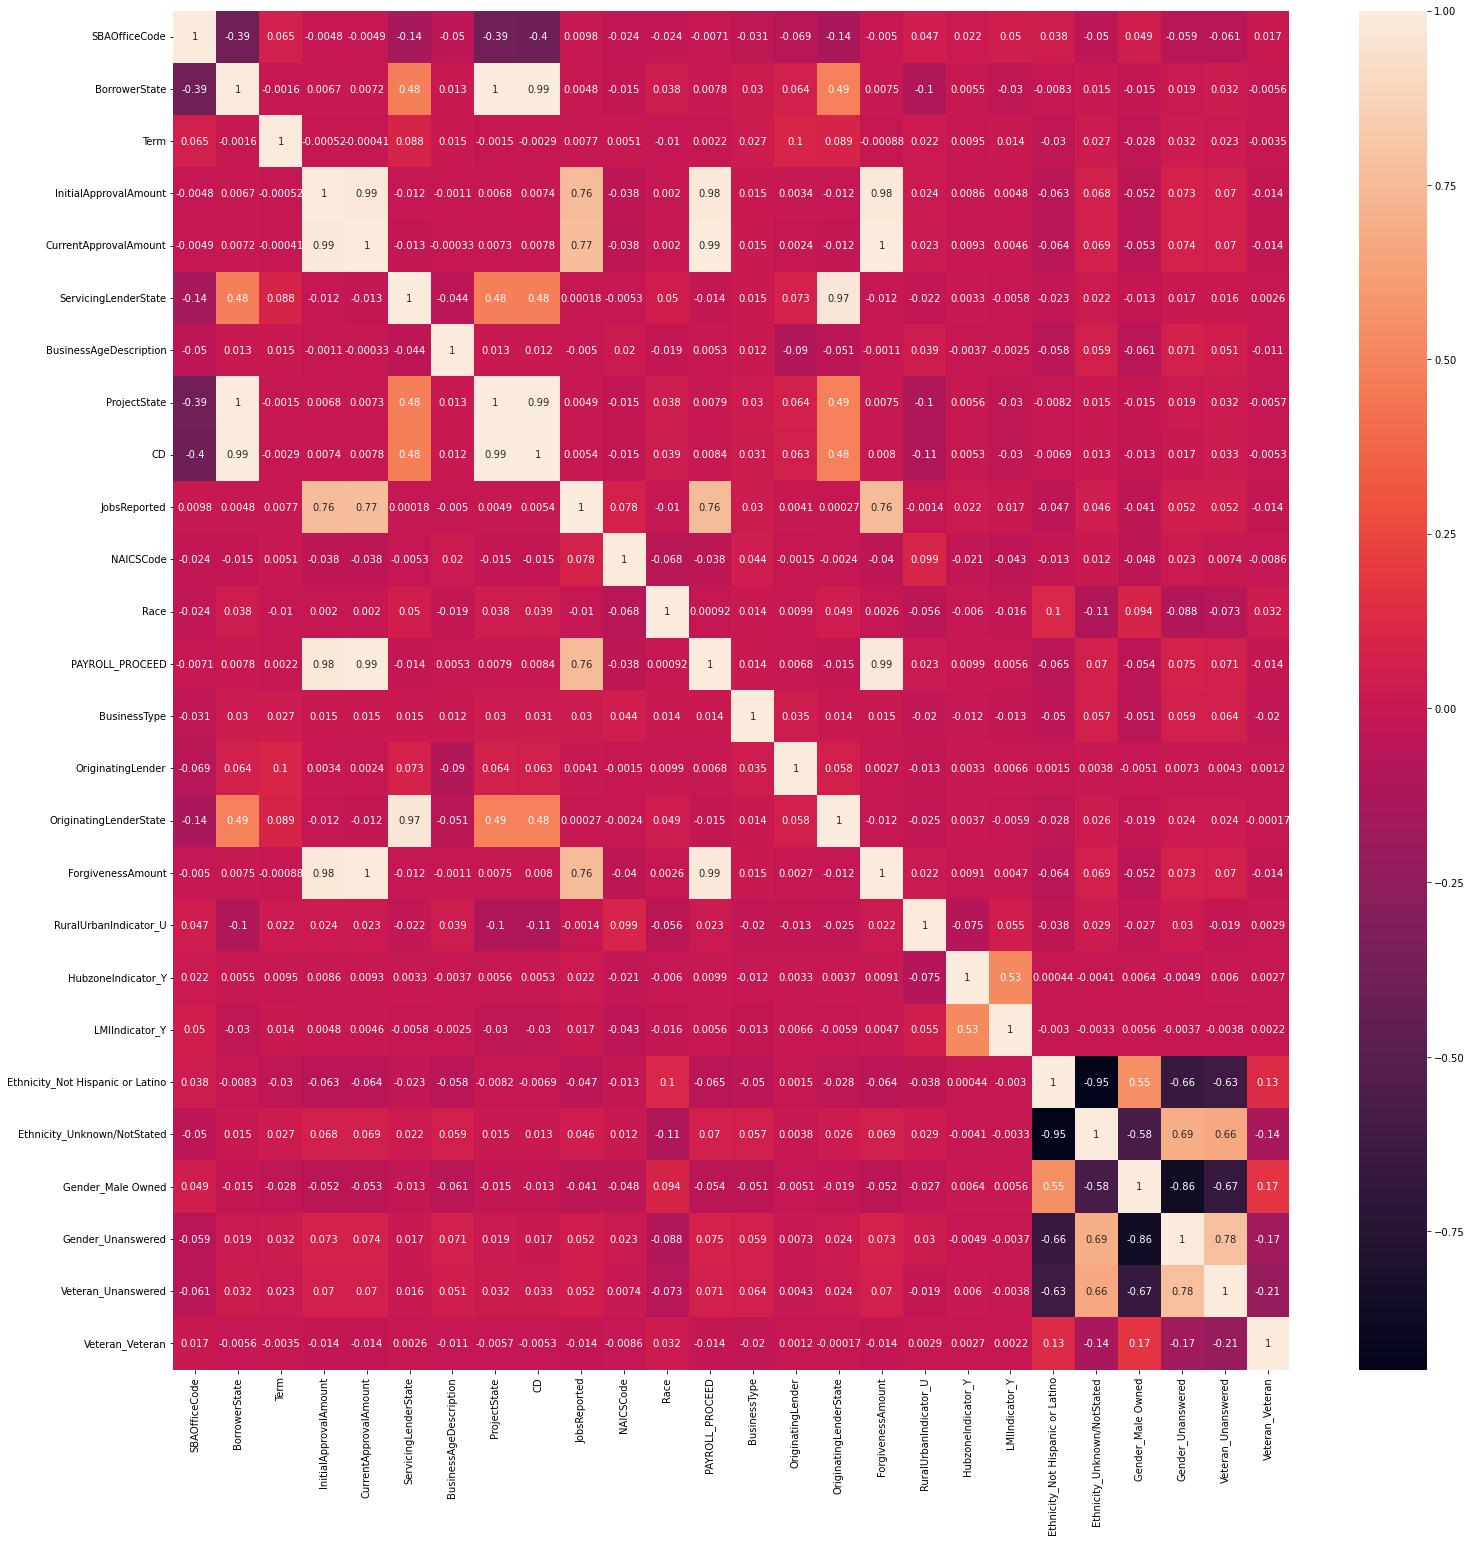

In [669]:
plt.figure(figsize=(25,25))
sns.heatmap(df_2020.corr(),annot=True)

In [670]:
df_2020.drop(['BorrowerState','InitialApprovalAmount','ServicingLenderState','CD','PAYROLL_PROCEED','CurrentApprovalAmount'],axis=1,inplace=True)

#Strong correlation betwwen variables

<AxesSubplot:>

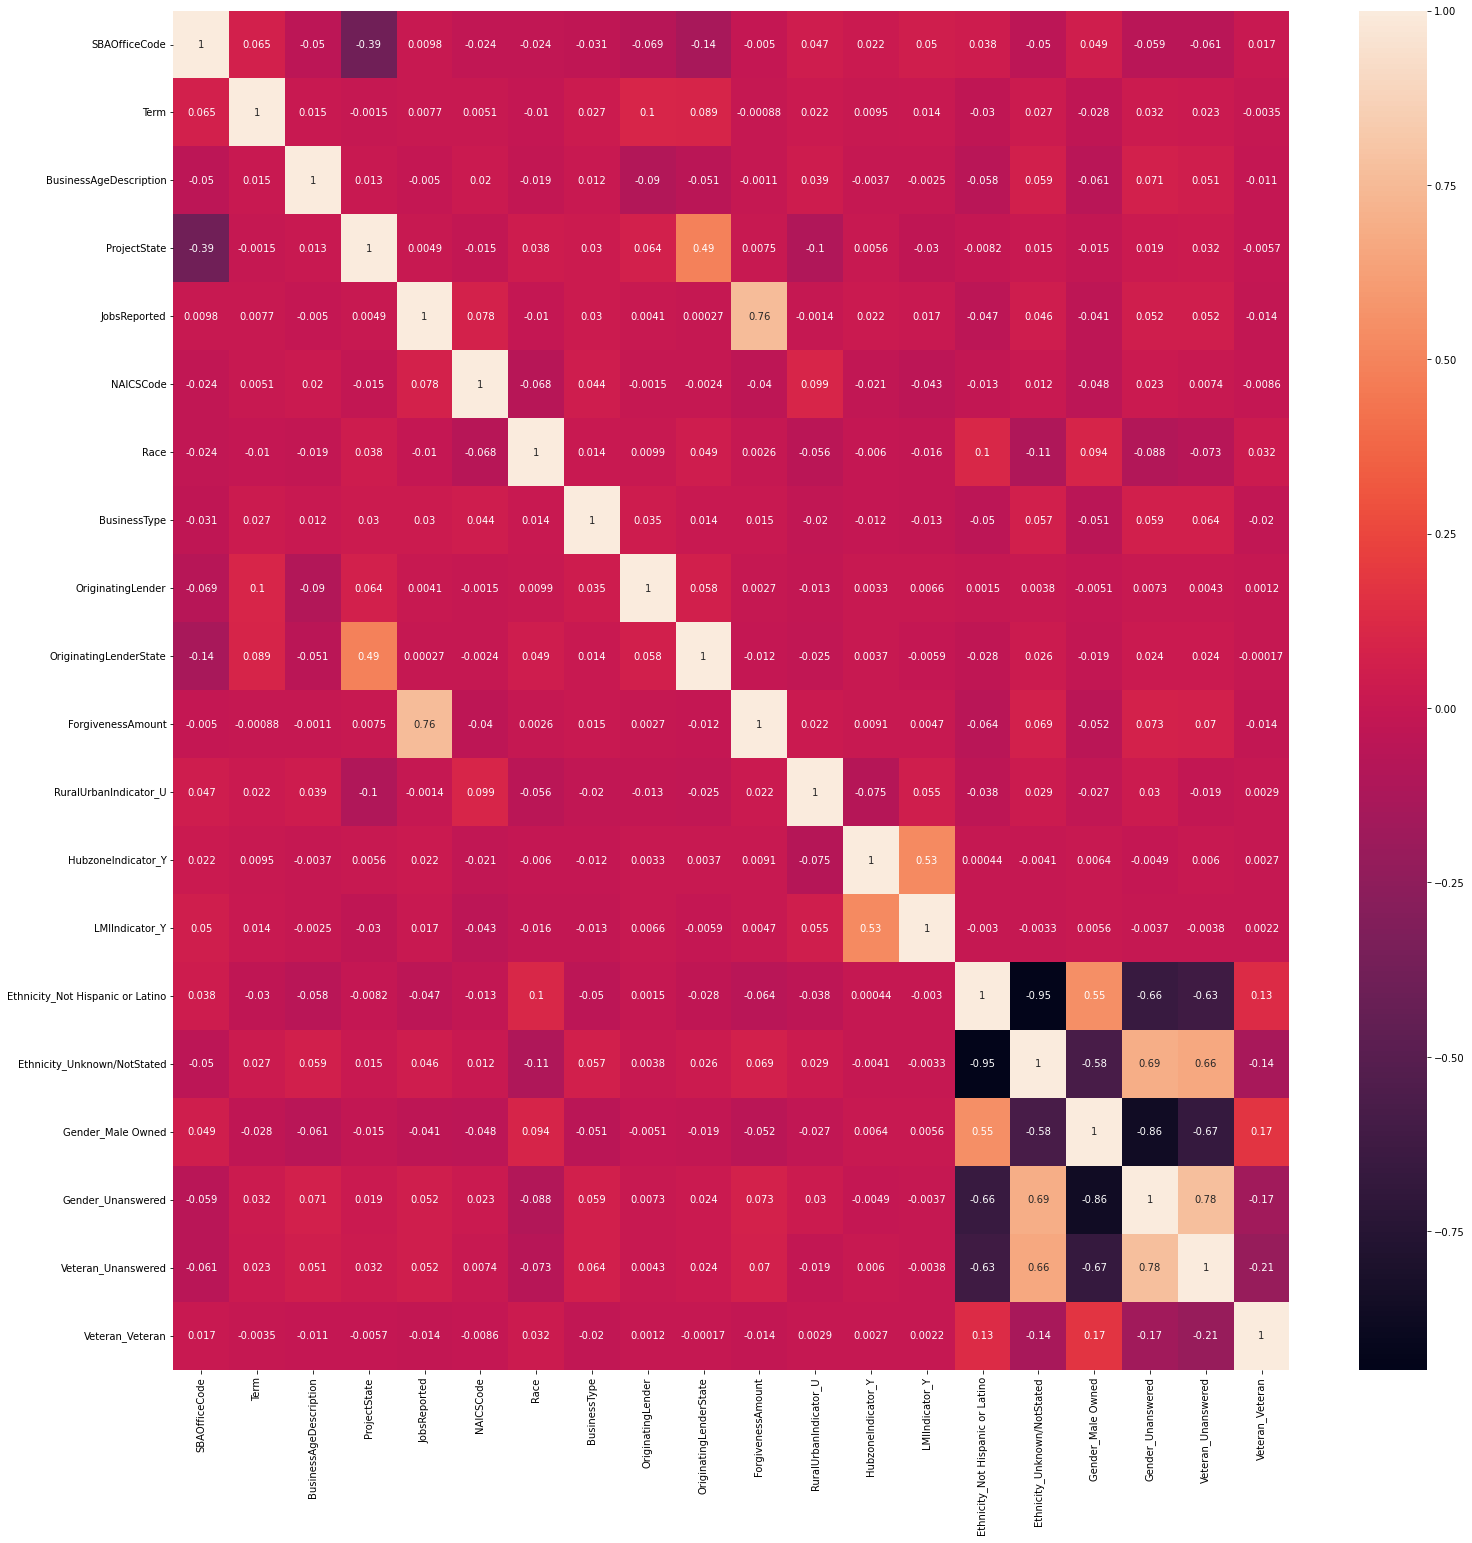

In [671]:
plt.figure(figsize=(25,25))
sns.heatmap(df_2020.corr(),annot=True)
#After removing highly correlated variables

# Model Building

In [672]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [673]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [674]:
x=df_2020.drop('ForgivenessAmount',axis=1)
y=df_2020['ForgivenessAmount']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)
# train test split 70 % data for tranning and 30 % data for testing

In [675]:
for i in num_feature:    
    sc = StandardScaler()
    xtrain[i] = sc.fit_transform(pd.DataFrame(xtrain[i]))
    xtest[i] = sc.transform(pd.DataFrame(xtest[i]))
# To avoid data leakage first split data and then scalling   

# LinearRegression Model 

In [676]:
lr=LinearRegression()
model_lr=lr.fit(xtrain,ytrain)
train_pred=model_lr.predict(xtrain)
test_pred=model_lr.predict(xtest)

In [700]:
print(r2_score(ytrain,train_pred))
print(r2_score(ytest,test_pred))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred)))

0.5963997708859867
0.594011120826434
error train  526846.6858319534
error test  513228.26313403615


Inference-The R-squared score for both the training and testing datasets is around 0.59, indicating a moderate fit. This means that the model can explain some of the variation in the dependent variable, but there is still room for improvement.

The root mean squared error (RMSE) for both the training and testing datasets is around 0.5 million, indicating a large difference between the predicted and actual values. This means that the model is not very accurate in predicting the values of the dependent variable.

The RMSE for the testing dataset is slightly lower than the RMSE for the training dataset, which suggests that the model may be slightly overfitting the training data.

Overall, the results suggest that the model may need further improvement to increase its accuracy and reduce its overfitting. This could involve tuning the hyperparameters of the model, selecting different features, or trying different algorithms.

# Check Multicolinarity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = [variance_inflation_factor(xtrain,i) for i in range(xtrain.shape[1])]

In [ ]:
pd.DataFrame({'VIF':vif},index=xtrain.columns).sort_values(by='VIF',ascending=False)

Inference-No multicolinarity between variables

# Lets take combination of all the transformation technique and see the performances

In [677]:
from scipy import stats
model_boxcox= sma.OLS(stats.boxcox(ytrain)[0], xtrain).fit()
print(model_boxcox.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          9.334e+05
Date:                Thu, 13 Apr 2023   Prob (F-statistic):                        0.00
Time:                        14:07:24   Log-Likelihood:                     -1.1420e+05
No. Observations:              131654   AIC:                                  2.284e+05
Df Residuals:                  131635   BIC:                                  2.286e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [687]:
model_sqrt= sma.OLS(np.sqrt(ytrain), xtrain).fit() # squared root transformation
model_cbrt= sma.OLS(np.cbrt(ytrain), xtrain).fit() # cube root transformation
model_log= sma.OLS(np.log(ytrain), xtrain).fit() # log transformation
model_yojh= sma.OLS(stats.yeojohnson(ytrain)[0], xtrain).fit() # YeoJohnson transformation

In [691]:
cols = ["Transformation", "R_Squared", "Adj Rsquared"]
df_cols = pd.DataFrame(columns=cols)

model_Trans = pd.Series({"Transformation": "Square Root",
                         "R_Squared": model_sqrt.rsquared,
                         "Adj Rsquared": model_sqrt.rsquared_adj
                        })
result = pd.concat([df_cols, model_Trans.to_frame().T], ignore_index=True)
result

,Transformation,R_Squared,Adj Rsquared
0,Square Root,0.913643,0.913631


In [692]:
model_Trans = pd.Series({"Transformation": "Cube Root",
                        "R_Squared": model_cbrt.rsquared,
                         "Adj Rsquared": model_cbrt.rsquared_adj
                        })
result = pd.concat([df_cols, model_Trans.to_frame().T], ignore_index=True)
result

,Transformation,R_Squared,Adj Rsquared
0,Cube Root,0.957613,0.957607


In [693]:
model_Trans = pd.Series({"Transformation": "Log",
                        "R_Squared": model_log.rsquared,
                         "Adj Rsquared": model_log.rsquared_adj
                        })
result = pd.concat([df_cols, model_Trans.to_frame().T], ignore_index=True)
result

,Transformation,R_Squared,Adj Rsquared
0,Log,0.991229,0.991228


In [694]:
model_Trans = pd.Series({"Transformation": "Box Cox",
                        "R_Squared": model_boxcox.rsquared,
                         "Adj Rsquared": model_boxcox.rsquared_adj
                        })
result = pd.concat([df_cols, model_Trans.to_frame().T], ignore_index=True)
result

,Transformation,R_Squared,Adj Rsquared
0,Box Cox,0.992633,0.992631


In [695]:
model_Trans = pd.Series({"Transformation": "Yeo Johnson",
                        "R_Squared": model_yojh.rsquared,
                         "Adj Rsquared": model_yojh.rsquared_adj
                        })
result = pd.concat([df_cols, model_Trans.to_frame().T], ignore_index=True)
result

,Transformation,R_Squared,Adj Rsquared
0,Yeo Johnson,0.992689,0.992688


In [699]:
# create an empty list to store the results
results = []

# loop through each model and store its results and transformation name
for model, trans_name in [(model_sqrt, "Square Root"),
                          (model_cbrt, "Cube Root"),
                          (model_log, "Log"),
                          (model_boxcox, "Box Cox"),
                          (model_yojh, "Yeo Johnson")]:
    result = {"Transformation": trans_name,
              "R_Squared": model.rsquared,
              "Adj Rsquared": model.rsquared_adj}
    results.append(result)

# create the merged DataFrame from the list of dictionaries
df = pd.DataFrame(results, columns=["Transformation", "R_Squared", "Adj Rsquared"])

# print the final merged DataFrame
df


,Transformation,R_Squared,Adj Rsquared
0,Square Root,0.913643,0.913631
1,Cube Root,0.957613,0.957607
2,Log,0.991229,0.991228
3,Box Cox,0.992633,0.992631
4,Yeo Johnson,0.992689,0.992688


Inference-The Box Cox and Yeo Johnson transformations seem to have resulted in the highest R-squared and adjusted R-squared values, followed closely by the log transformation. The square root and cube root transformations have resulted in slightly lower values, but still provide a good fit to the data.

Overall, these results suggest that the choice of transformation can have a significant impact on the performance of the linear regression model, and it is important to carefully select the appropriate transformation based on the characteristics of the data and the goals of the analysis.

# Selecting significant features

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
sfs=SequentialFeatureSelector(estimator=lr,k_features='best',scoring='r2')
model=sfs.fit(xtrain,ytrain)

In [ ]:
best_features=list(model.k_feature_names_)
best_features

In [ ]:
model_sfs = LinearRegression()

In [ ]:
model_sfs.fit(xtrain[best_features],ytrain)

In [ ]:
train_pred_sfs=model_sfs.predict(xtrain[best_features])
test_pred_sfs=model_sfs.predict(xtest[best_features])

In [701]:
print(r2_score(ytrain,train_pred_sfs))
print(r2_score(ytest,test_pred_sfs))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_sfs)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_sfs)))

0.5955166846727556
0.5931019844685259
error train  527422.7469864722
error test  513802.5812706685


#Inference-The R-squared score for both the training and testing datasets using SFS is very similar to the R-squared score obtained without feature selection. This suggests that the selected features did not have a significant impact on the performance of the model.

The RMSE for both the training and testing datasets using SFS is slightly higher than the RMSE obtained without feature selection. This suggests that the selected features may have removed some important information from the data, leading to a slightly less accurate model.

# Regularization Technique

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
model_ridge = Ridge(alpha=100)

In [ ]:
model_ridge.fit(xtrain,ytrain)

In [ ]:
train_pred_ridge = model_ridge.predict(xtrain)
test_pred_ridge= model_ridge.predict(xtest)

In [702]:
print(r2_score(ytrain,train_pred_ridge))
print(r2_score(ytest,test_pred_ridge))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_ridge)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_ridge)))

0.5955228963246193
0.593082180224034
error train  527418.6971543244
error test  513815.08483143966


Inference-The R-squared score for both the training and testing datasets using Ridge regression is very similar to the R-squared score obtained without using Ridge regression. This suggests that Ridge regression did not have a significant impact on the performance of the model.

The RMSE for both the training and testing datasets using Ridge regression is slightly higher than the RMSE obtained without using Ridge regression. This suggests that Ridge regression may have slightly reduced the accuracy of the model.

Overall, the results suggest that Ridge regression did not have a significant impact on the performance of the model. Further analysis may be necessary to determine whether other regularization techniques or model architectures can be used to improve the performance of the model.



# Hypertunning Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

Ridge

In [ ]:
grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}

In [ ]:
best_param = GridSearchCV(estimator=Ridge(),
                   param_grid=grid,cv=3,scoring='r2',verbose=3)

In [ ]:
best_param.fit(xtrain,ytrain)

In [ ]:
best_param.best_params_# best paramter alpha

Lasso

In [ ]:
lasso=Lasso(alpha=10)
lasso.fit(xtrain,ytrain)

In [ ]:
train_pred_lasso = lasso.predict(xtrain)
test_pred_lasso= lasso.predict(xtest)

In [704]:
print(r2_score(ytrain,train_pred_lasso))
print(r2_score(ytest,test_pred_lasso))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_lasso)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_lasso)))

0.5955232863286766
0.5930640142220346
error train  527418.4428809929
error test  513826.55380777


Inference-The R-squared score for both the training and testing datasets using Lasso regression is very similar to the R-squared score obtained without using Lasso regression. This suggests that Lasso regression did not have a significant impact on the performance of the model.

The RMSE for both the training and testing datasets using Lasso regression is slightly higher than the RMSE obtained without using Lasso regression. This suggests that Lasso regression may have slightly reduced the accuracy of the model.

Overall, the results suggest that Lasso regression did not have a significant impact on the performance of the model. Further analysis may be necessary to determine whether other regularization techniques or model architectures can be used to improve the performance of the model.

In [ ]:
#gridsearchcv
best_param_lasso=GridSearchCV(estimator=lasso,param_grid=grid,cv=3,scoring='r2',verbose=3)

In [ ]:
best_param_lasso.fit(xtrain,ytrain)

In [ ]:
best_param_lasso.best_params_

In [ ]:
grid = {'alpha':[0.1,1,10,100],
       'l1_ratio':[0.05,0.1,0.15,0.2]}

In [ ]:
best_param_elasticnet = GridSearchCV(estimator=ElasticNet(),
                   param_grid=grid,cv=3,scoring='r2',verbose=3)

In [ ]:
best_param_elasticnet.fit(xtrain,ytrain)

In [ ]:
best_param_elasticnet.best_params_#best parameter

In [ ]:
ElasticNet=ElasticNet(alpha=0.1,l1_ratio=0.2)#building model using best parameter
ElasticNet.fit(xtrain,ytrain)

In [ ]:
train_pred_ElasticNet=ElasticNet.predict(xtrain)
test_pred_ElasticNet=ElasticNet.predict(xtest)

In [703]:
print(r2_score(ytrain,train_pred_ElasticNet))
print(r2_score(ytest,test_pred_ElasticNet))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_ElasticNet)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_ElasticNet)))

0.5920303705899845
0.5913024787276658
error train  529690.8457082228
error test  514937.473385477


Inference-The R-squared score for both the training and testing datasets using ElasticNet regression is slightly lower than the R-squared score obtained without using ElasticNet regression. This suggests that ElasticNet regression may have slightly reduced the performance of the model.

The RMSE for both the training and testing datasets using ElasticNet regression is higher than the RMSE obtained without using ElasticNet regression. This suggests that ElasticNet regression has reduced the accuracy of the model.

Overall, the results suggest that ElasticNet regression may have slightly reduced the performance of the model. Further analysis may be necessary to determine whether other regularization techniques or model architectures can be used to improve the performance of the model.

# OLS Model

In [ ]:
import statsmodels.api as sma
x=df_2020.drop('ForgivenessAmount',axis=1)
y=df_2020['ForgivenessAmount']
x_conc=sma.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(x_conc,y,test_size=0.3,random_state=100)

In [ ]:
ols_model=sma.OLS(ytrain,xtrain).fit()
ols_model.summary()

Inference-The OLS model has an R-squared value of 0.596, which means that the model explains about 59.6% of the variance in the target variable. The adjusted R-squared value is slightly lower at 0.595. The F-statistic is significant with a p-value of 0.00, indicating that the model is a good fit.

Looking at the coefficients, we can see that several variables have a statistically significant relationship with the target variable (p-value < 0.05). These variables include SBAOfficeCode, Term, RuralUrbanIndicator, LMIIndicator, ProjectState, JobsReported, NAICSCode, BusinessType, OriginatingLenderState, Not Hispanic or Latino, and Male Owned.

On the other hand, some variables such as HubzoneIndicator, BusinessAgeDescription, and OriginatingLender have p-values greater than 0.05, indicating that their relationship with the target variable is not statistically significant.

Overall, the OLS model seems to be a good fit for the data, but further analysis and testing may be required to improve its performance.

# Assumptions of Linear Regression Model

1. Linearity.
2. Normality.
3. Multicollinearity.
4. Hetroscedasticity.
5. Autocorrelation of errors.

Test of Linearity - Rainbow Test

H0: Data has Linear relationship with the Target.

Ha: Data has no linear relationship with the Target.

In [ ]:
sma.stats.linear_rainbow(ols_model)

Inference-Since the p value is greater than 0.05. Failed to reject the null hypothesis. Data has Linear relationship with the Target.

Test of Normality - Jarque Bera Test

H0: Data/Residual are Normally distributed.

Ha: Data/Residuals are not Normally distributed.

In [ ]:
import scipy.stats as stats

In [ ]:
stats.jarque_bera(ols_model.resid)

Inference-Since p<0.05 reject null therefore Data/Residuals are not Normally distributed.

QQ Plots

In [ ]:
sma.qqplot(ols_model.resid,line='r')

Test of Multicollinearity -

Conditon No tells the presence of Multicollinearity but does not tell about the columns which have Multicollinear Condition No: Will tell about the whole model.VIF will tell about each and every column.

Test of Heteroscedasticity-BreuschPagan Test

H0: There is equal variance present in the data

Ha: There is unequal variance in the data.

In [ ]:
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
import statsmodels.stats.api as ssa
#model.exog: It represents all the data points or input variables.
#exog : Independent Variables.
#endog : Dependent Variables.
# This is compared between residuals vs actual values.
ssa.het_breuschpagan(ols_model.resid,ols_model.ols_model.exog)

Inference- BreushPagan Test Statistics and p value 34011.89, 0.0 Fstatistics and p value 2697.23, 0.0 The first 2 values are BreushPagan Test statistics and p value. The second set of values are FStatistics and p value. There are 2 values coming out here because of the input. One is the Test that we are conducting and other is the Fstatistics of the Input data. P value < 0 . Which means the data is Heteroscedastic

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(ols_model.resid)

Inference-Durbin Watson should be between 1.5 to 2.5. There is presence of Auto correlation of errors.

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

In [ ]:
train_pred_rf=rf.predict(xtrain)
test_pred_rf=rf.predict(xtest)

In [143]:
print(r2_score(ytrain,train_pred_rf))
print(r2_score(ytest,test_pred_rf))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_rf)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_rf)))

0.9644770572951474
0.7411678244596402
error train  156301.45399418677
error test  409791.1992945972


Inference-Based on the results, the Random Forest Regressor model appears to be overfitting the data as it has a much higher R-squared value on the training set than on the test set (0.964 vs 0.741). Additionally, the root mean squared error is much lower on the training set than on the test set (156301 vs 409791). This suggests that the model is not generalizing well to new data.

In [ ]:
# tunned paramter for RandomForestRegressor

In [144]:
tuned_paramaters = [{'criterion': ['squared_error'],
                     'n_estimators': [10, 30, 50, 70, 90,100],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11]}]
rf=RandomForestRegressor()

In [145]:
rf_grid=GridSearchCV(estimator=rf,param_grid=tuned_paramaters,cv=3)
rf_grid_model=rf_grid.fit(xtrain,ytrain)

In [146]:
print('Best parameters for random forest Regressor: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest Regressor:  {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100} 



In [147]:
rf=RandomForestRegressor(criterion='squared_error', max_depth= 20, min_samples_split= 2, n_estimators=100)

In [148]:
model_rf=rf.fit(xtrain,ytrain)
train_pred_rf=model_rf.predict(xtrain)
test_pred_rf=model_rf.predict(xtest)

In [149]:
print(r2_score(ytrain,train_pred_rf))
print(r2_score(ytest,test_pred_rf))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_rf)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_rf)))

0.95743931692544
0.7373370896177485
error train  171085.35888254864
error test  412812.5310055903


InferenceThe random forest regressor seems to have overfit the training data as the R-squared value for training data (0.9574) is much higher than that of the test data (0.7373). The root mean squared error (RMSE) of the test data is also quite high compared to the training data, which indicates that the model is not generalizing well to new data.

However, after hyperparameter tuning, the performance of the model on the test data has improved slightly. The RMSE of the test data has decreased slightly from 409791.19 to 412812.53.

# GradientBoostingRegressor

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
gbr=GradientBoostingRegressor()
model_gbr=gbr.fit(xtrain,ytrain)
train_pred_gbr=model_gbr.predict(xtrain)
test_pred_gbr=model_gbr.predict(xtest)

In [154]:
print(r2_score(ytrain,train_pred_gbr))
print(r2_score(ytest,test_pred_gbr))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_gbr)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_gbr)))

0.7033656043133306
0.6854194523754067
error train  451667.9808137658
error test  451772.1220198248


Inference-Based on the results you provided, it seems that the GradientBoostingRegressor model has an R-squared score of 0.703 on the training set and 0.685 on the test set, and the root mean squared error (RMSE) is around 451667 for both the training and test sets. This means that the model has a moderate predictive power and performs similarly on both the training and test sets, which indicates that the model is not overfitting or underfitting.

Overall, the GradientBoostingRegressor model seems to perform reasonably well on this dataset, but there might still be room for improvement. It might be worth exploring other models or tuning the hyperparameters of the current model further to see if better results can be achieved.

# SGDRegressor

In [165]:
from sklearn.linear_model import SGDRegressor

In [166]:
sgd = SGDRegressor()

In [169]:
params=({'alpha':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25]})
grid=GridSearchCV(estimator=sgd,
                  scoring='neg_mean_squared_error',
                  param_grid=params,cv=2)

In [170]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=2, estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.2, 0.3, 0.5, 0.7, 0.8,
                                   0.9, 0.25]},
             scoring='neg_mean_squared_error')

In [171]:
grid.best_params_

{'alpha': 0.5}

In [179]:
sgd = SGDRegressor(alpha=0.5)

In [180]:
model_sgd=sgd.fit(xtrain,ytrain)
train_pred_sgd=model_sgd.predict(xtrain)
test_pred_sgd=model_sgd.predict(xtest)

In [181]:
print(r2_score(ytrain,train_pred_sgd))
print(r2_score(ytest,test_pred_sgd))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_sgd)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_sgd)))

-3.5221728074213645e+17
-3.7522268913411686e+17
error train  492168574749764.1
error test  493398746360100.56


Inference-The negative R-squared values and high root mean squared error values for both training and testing sets suggest that the model is not performing well with SGDRegressor. It could be due to the fact that the linear regression assumptions may not hold true for the data, or there might be a problem with the features or the model parameters. You may want to try other regression models such as Random Forest or Gradient Boosting and compare the results.





# XGBRegressor

In [191]:
from xgboost import XGBRegressor

In [194]:
xgb=XGBRegressor()
model_xgb=xgb.fit(xtrain,ytrain)
train_pred_xgb=model_xgb.predict(xtrain)
test_pred_xgb=model_xgb.predict(xtest)

In [195]:
print(r2_score(ytrain,train_pred_xgb))
print(r2_score(ytest,test_pred_xgb))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_xgb)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_xgb)))

0.8630972986818299
0.7284224269011831
error train  306841.82643967395
error test  419759.4164042338


In [197]:
# Define the XGBRegressor model
model = XGBRegressor()

# Define the hyperparameter search space
param_grid = {
    'learning_rate': [0.1, 0.01,0.5,1,10],
    'max_depth': [3, 5,7],
    'n_estimators': [50, 100, 200]
}

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(xtrain,ytrain)

# Print the best hyperparameters and mean cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score:  -186461065933.93622


In [198]:
xgb=XGBRegressor(learning_rate=0.1, max_depth= 5, n_estimators= 200)
model_xgb=xgb.fit(xtrain,ytrain)
train_pred_xgb=model_xgb.predict(xtrain)
test_pred_xgb=model_xgb.predict(xtest)

In [199]:
print(r2_score(ytrain,train_pred_xgb))
print(r2_score(ytest,test_pred_xgb))
print('error train ',np.sqrt(mean_squared_error(ytrain,train_pred_xgb)))
print('error test ',np.sqrt(mean_squared_error(ytest,test_pred_xgb)))

0.7956992139078455
0.7266720700360534
error train  374837.9631000244
error test  421109.94897806377


Inference- These metrics can be used to give an inference of the XGBRegressor's performance on the training and testing data. The R-squared values indicate the proportion of variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit of the model to the data. The root mean squared error (RMSE) measures the average magnitude of the error between the predicted and actual values, with lower values indicating better performance.

Therefore, based on the metrics you provided, the XGBRegressor appears to have performed better than the other models, with an R-squared value of 0.795 on the training data and 0.727 on the testing data, and an RMSE of 374,838 on the training data and 421,110 on the testing data.

Overall performance of all model-Based on the evaluation metrics (R2 score and RMSE), the best performing model appears to be the XGB Regressor, followed by the Random Forest Regressor and the Gradient Boosting Regressor. The SGD Regressor performs very poorly and should not be considered. However, it's important to note that the performance of each model can vary depending on the specific dataset and problem being tackled, so it's always a good idea to try multiple models and evaluate their performance before making a final decision.

# Conclusion

In [709]:
results = []

# loop through each model and store its results and transformation name
for model, trans_name in [(model_sqrt, "Square Root"),
                          (model_cbrt, "Cube Root"),
                          (model_log, "Log"),
                          (model_boxcox, "Box Cox"),
                          (model_yojh, "Yeo Johnson")]:
    result = {"Transformation": trans_name,
              "R_Squared": model.rsquared,
              "Adj Rsquared": model.rsquared_adj}
    results.append(result)

# create the merged DataFrame from the list of dictionaries
df = pd.DataFrame(results, columns=["Transformation", "R_Squared", "Adj Rsquared"])

# print the final merged DataFrame
df


,Transformation,R_Squared,Adj Rsquared
0,Square Root,0.913643,0.913631
1,Cube Root,0.957613,0.957607
2,Log,0.991229,0.991228
3,Box Cox,0.992633,0.992631
4,Yeo Johnson,0.992689,0.992688


Inference-Inference-The Box Cox and Yeo Johnson transformations seem to have resulted in the highest R-squared and adjusted R-squared values, followed closely by the log transformation. The square root and cube root transformations have resulted in slightly lower values, but still provide a good fit to the data.

Overall, these results suggest that the choice of transformation can have a significant impact on the performance of the linear regression model, and it is important to carefully select the appropriate transformation based on the characteristics of the data and the goals of the analysis.



In [707]:
Result=pd.DataFrame({'Model Name':['LinearRegression','SFS','Ridge','Lasso','ElasticNet','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor'],
                     'R2 Score(Xtrain)':[0.5963,0.5955,0.5955,0.5955,0.5920,0.9644,0.7033,0.7956],
                     'R2 Score(Xtest)':[0.5940,0.5931,0.5930,0.5930,0.5913,0.7373,0.6854,0.7266]})

In [708]:
Result

,Model Name,R2 Score(Xtrain),R2 Score(Xtest)
0,LinearRegression,0.5963,0.5940
1,SFS,0.5955,0.5931
2,Ridge,0.5955,0.5930
3,Lasso,0.5955,0.5930
4,ElasticNet,0.5920,0.5913
5,RandomForestRegressor,0.9644,0.7373
6,GradientBoostingRegressor,0.7033,0.6854
7,XGBRegressor,0.7956,0.7266


Inference-Based on the R2 scores, we can see that the Random Forest Regressor has the highest performance on the training data, with an R2 score of 0.9644. This suggests that the Random Forest model is able to explain a large proportion of the variance in the training data.

However, when it comes to the test data, the Random Forest model has a significantly lower R2 score compared to the training data, which is an indication of overfitting. On the other hand, the Linear Regression, SFS, Ridge, and Lasso models have similar performance on both training and test data, which suggests that these models are generalizing well and not overfitting.

The ElasticNet model has a slightly lower R2 score than the Linear Regression, SFS, Ridge, and Lasso models, but its performance on the test data is comparable. This suggests that the ElasticNet model may be a good choice if we want to balance between model simplicity and predictive performance.

Therefore, the XGBRegressor appears to have performed better than the other models, with an R-squared value of 0.795 on the training data and 0.727 on the testing data.